#  Forecasting covid-19 with Linier Regression, Support Vector Machine and Time Series (AR, ARIMA Model)

Metode yang digunakan untuk forecasting adalah linier regression, support vector machine dan Time series (AR dan ARIMA Model). 

Dataset yang digunakan adalah 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE Dataset) dan Indonesian Coronavirus Dataset

Data hasil prediksi yang diperlihatkan Pada metode time series AR dan ARIMA Model memprediksi kasus kematian (Deaths) dan kasus confirmed tertanggal 10-14 April 2020 (1 hari setelah coding dibuat) dan tanggal 22-26 April 2020. Jadi, diperlihatkan 5 hari awal dan 5 hari akhir.


- https://www.kaggle.com/khotijahs1/data-visualisation-indonesia-coronavirus (code)
- https://www.kaggle.com/ardisragen/indonesia-coronavirus-cases (dataset)

- https://github.com/CSSEGISandData/COVID-19 (dataset)
- https://www.kaggle.com/neelkudu28/covid-19-visualizations-predictions-forecasting (code)

### CSCEGISandData 
* covid_19_data.csv
    * Sno - Serial number
    * ObservationDate - Date of the observation in MM/DD/YYYY
    * Province/State - Province or state of the observation (Could be empty when missing)
    * Country/Region - Country of observation
    * Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)
    * Confirmed - Cumulative number of confirmed cases till that date
    * Deaths - Cumulative number of of deaths till that date
    * Recovered - Cumulative number of recovered cases till that date

### Indonesian Coronavirus Dataset
* Cases.scv
    * date = Date
    * new_testedNumber of new tested in this day
    * acc_testedTotal number of tested samples
    * new_confirmedNumber of new confirmed cases in this day
    * acc_confirmedtotal/accumulate of confirmed cases
    * acc_negativetotal/accumulate of negative cases
    * being_checkedtotal/accumulate of sample under examination
    * isolatedtotal/accumulate isolated patient
    * new_releasedNumber of new release cases in this day
    * acc_releasedtotal/accumulate of release cases
    * new_deceasedNumber of new decease/death cases in this day
    * acc_deceasedtotal/accumulate of deceased cases
    * positive_ratenumber of confirmed per number of tested
    * negative_ratenumber of negative per number of tested
    * decease_ratenumber of decease per number of confirmed
    * release_ratenumber of release per number of confirmed
    * dailypositive_ratenumber of new positive per number of new tested in this day
* Jabar.csv
    * date = Date
    * positive_totalTotal Confirmed Positive Cases in Jabar
    * positive_dailydaily confirmed positive cases in Jabar
    * odp_processNumber of People Under Monitoring in Process
    * odp_endNumber People End Monitoring
    * odp_totalTotal Number of People under monitoring
    * odp_dailyDaily Number Increase of People under monitoring
    * pdp_processNumber of Processed Patient Under Surveillance
    * pdp_endNumber of Patient end surveillance
    * pdp_totalTotal Number of Patient under suveillance
    * pdp_dailyDaily number increase of Patient under surveillance
    * total_deceasedTotal Deceased cases
    * total_releasedTotal Released Cases
    * total_positive_kotabekasiTotal positive case in Kota Bekasi
    * total_positive_depokTotal positive case in Kota depok
    * total_positive_kabbekasiTotal positive case in kab bekasi
    * total_positive_kotabandungTotal positive case in kota Bandung
    * total_positive_kotabogorTotal Positive case in Kota Bogor
    * total_positive_kabbogorTotal Positive case in Kab Bogor
    * total_positive_kotacimahiTotal Positive case in Kota Cimahi
    * total_positive_kabbandungTotal Positive case in kab bandung
    * total_positive_kabkuninganTotal Positive case in Kab kuningan
    * total_positive_kabpurwakartaTotal Positive Case in Kab Purwakarta
    * total_positive_kabcirebonTotal Positive case in Kab Cirebon
    * total_positive_kabsukabumiTotal Positive case in kab Sukabumi
    * total_positive_kabsumedangTotal Positive case in Kab Sumedang
    * total_positive_kotatasikmalayaTotal Positive Case in Kota Tasikmalaya
    * total_positive_kabciamisTotal Positive case in Kab Ciamis
    * total_positive_kabcianjurtotal Positive case in Kab Cianjur
    * total_positive_kabgarutTotal Positive case in Kab Garut
    * total_positive_kabindramayuTotal Positive Case in Kab Indramayu
    * total_positive_kabkarawangTotal Positive case in Kab Karawang
    * total_positive_kabmajalengkaTotal Positive case in Kab Majalengka
    * total_positive_kabpangandaranTotal Positive case in Kab Pangandaran
    * total_positive_kabsubangTotal Positive case in Kab Subang
    * total_positive_kabtasikmalayaTotal Positive case in Kab Tasikmalaya
    * total_positive_kotabanjarTotal Positive case in Kota Banjar
    * total_positive_kotacirebonTotal positive case in Kota Cirebon
    * total_positive_kotasukabumiTotal Positive case in Kota Sukabumi
* Jakarta.csv
    * date = Date
    * odp_processNumber of People Under Monitoring
    * odp_endNumber of People End Monitoring
    * odp_totalTotal People In Monitoring
    * pdp_processNumber of Patient Under Surveillance
    * pdp_endNumber of Patient End Surveillance
    * pdp_totalTotal Patient In Surveillance
    * jakbarTotal PDP and ODP in West Jakarta
    * jakpusTotal PDP and ODP in Central Jakarta
    * jakselTotal PDP and ODP in South Jakarta
    * jaktimTotal PDP and ODP in East Jakarta
    * jakutTotal PDP and ODP in North Jakarta
    * outsidejakartaTotal PDP and ODP surrounded Jakarta
    * unknownTotal PDP and ODP in Jakarta (Unknown)
    * confirmedTotal Confirmed Positive Cases
    * releasedTotal Released Cases
    * deceasedTotal Death Cases
    * hospitalizedNumber of Confirmed Cases Under Hospitalized
    * self_isolatedNumber of Confirmed Cases Self Isolation
* Patient.csv
    * patient_idthe ID of the patient (n-th confirmed patient)
    * genderthe gender of the patient
    * agethe age of the patient
    * nationalitythe nationality of patient
    * provincethe region/province of the patient
    * current_statethe city of the patient
    * contacted_withcontacted/get infected by patient id number
    * confirmed_datethe date of confirmation
    * released_datethe date of discharge
    * deceased_datethe date of decease
    * hospitalhospitalized location

# Step 1 - Importing Library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#pd.set_option('display.float_format', lambda x: '%.6f' % x)

# Step 2 - Data preparation, prepocessing

In [2]:
covid=pd.read_csv("covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
13524,13525,04/09/2020,Wyoming,US,2020-04-09 23:09:19,230.0,0.0,0.0
13525,13526,04/09/2020,Xinjiang,Mainland China,2020-04-09 23:09:19,76.0,3.0,73.0
13526,13527,04/09/2020,Yukon,Canada,2020-04-09 23:09:19,7.0,0.0,0.0
13527,13528,04/09/2020,Yunnan,Mainland China,2020-04-09 23:09:19,184.0,2.0,173.0
13528,13529,04/09/2020,Zhejiang,Mainland China,2020-04-09 23:09:19,1267.0,1.0,1235.0


In [4]:
print("Size/Shape of the dataset: ",covid.shape)
print("Checking for null values:\n",covid.isnull().sum())
print("Checking Data-type of each column:\n",covid.dtypes)

Size/Shape of the dataset:  (13529, 8)
Checking for null values:
 SNo                   0
ObservationDate       0
Province/State     6562
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
Checking Data-type of each column:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


#### <code style="background:black;color:white"> Menghilangkan kolom "SNo" dan "Province/State" karena mengandung terlalu banyak missing values </code>

In [5]:
covid.drop(["SNo"],1,inplace=True)

#### <code style="background:black;color:white"> Convert "Observation Date" kedalam format Datetime agar bisa di prosess kedalam koding </code>

In [6]:
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

#### <code style="background:black;color:white"> Data terbaru setelah prepocessing </code>

In [7]:
covid

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
13524,2020-04-09,Wyoming,US,2020-04-09 23:09:19,230.0,0.0,0.0
13525,2020-04-09,Xinjiang,Mainland China,2020-04-09 23:09:19,76.0,3.0,73.0
13526,2020-04-09,Yukon,Canada,2020-04-09 23:09:19,7.0,0.0,0.0
13527,2020-04-09,Yunnan,Mainland China,2020-04-09 23:09:19,184.0,2.0,173.0


# Step 3 - Coding (analisa, traning machine learning for forecasting)

## <code style="background:Green;color:white"> Analysis by Date/time

#### <code style="background:black;color:white"> Mengelompokkan berbagai jenis kasus sesuai tanggal (per 22 Januari - 09 April). 1 hari sebelum pembuatan koding </code>

In [8]:
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [9]:
datewise

,Confirmed,Recovered,Deaths
ObservationDate,,,
2020-01-22,555.0,28.0,17.0
2020-01-23,653.0,30.0,18.0
2020-01-24,941.0,36.0,26.0
2020-01-25,1438.0,39.0,42.0
2020-01-26,2118.0,52.0,56.0
...,...,...,...
2020-04-05,1272115.0,260012.0,69374.0
2020-04-06,1345101.0,276515.0,74565.0
2020-04-07,1426096.0,300054.0,81865.0


In [10]:
print("Informasi utama COVID-19")
print("Total negara yang sudah terpapar COVID-19: ",len(covid["Country/Region"].unique()))
print("Total kasus yang sudah dikonfirmasi di dunia: ",datewise["Confirmed"].iloc[-1])
print("Total kasus yang sudah di recovered di dunia: ",datewise["Recovered"].iloc[-1])
print("Total kasus kematian di dunia: ",datewise["Deaths"].iloc[-1])
print("Total kasus aktif di dunia: ",(datewise["Confirmed"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total kasus non-aktif di dunia: ",datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1])
print("Perkiraan kasus yang di konfirmasi per-hari di dunia: ",np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0]))
print("Perkiraan kasus yang di recovered per-hari di dunia: ",np.round(datewise["Recovered"].iloc[-1]/datewise.shape[0]))
print("Perkiraan kasus kematian per-hari di dunia: ",np.round(datewise["Deaths"].iloc[-1]/datewise.shape[0]))
print("Perkiraan kasus yang di konfirmasi per-jam di dunia: ",np.round(datewise["Confirmed"].iloc[-1]/((datewise.shape[0])*24)))
print("Perkiraan kasus yang di recovered per-jam di dunia: ",np.round(datewise["Recovered"].iloc[-1]/((datewise.shape[0])*24)))
print("Perkiraan kasus kematian per-jam di dunia: ",np.round(datewise["Deaths"].iloc[-1]/((datewise.shape[0])*24)))

Informasi utama COVID-19
Total negara yang sudah terpapar COVID-19:  219
Total kasus yang sudah dikonfirmasi di dunia:  1595350.0
Total kasus yang sudah di recovered di dunia:  353975.0
Total kasus kematian di dunia:  95455.0
Total kasus aktif di dunia:  1145920.0
Total kasus non-aktif di dunia:  449430.0
Perkiraan kasus yang di konfirmasi per-hari di dunia:  20194.0
Perkiraan kasus yang di recovered per-hari di dunia:  4481.0
Perkiraan kasus kematian per-hari di dunia:  1208.0
Perkiraan kasus yang di konfirmasi per-jam di dunia:  841.0
Perkiraan kasus yang di recovered per-jam di dunia:  187.0
Perkiraan kasus kematian per-jam di dunia:  50.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text xticklabel objects>)

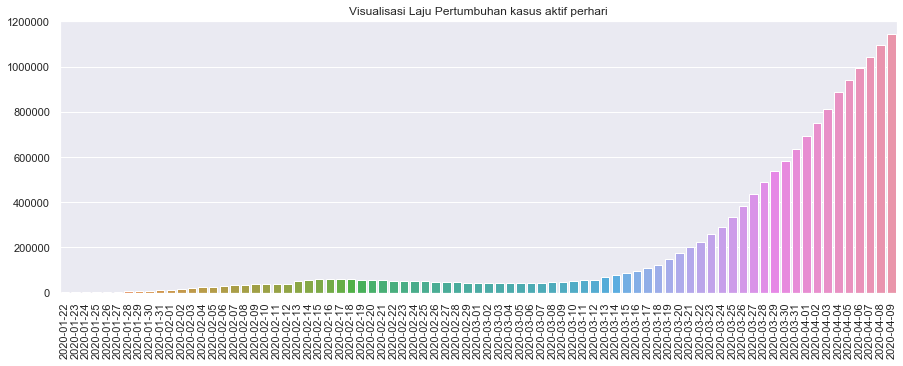

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Visualisasi Laju Pertumbuhan kasus aktif perhari")
plt.xticks(rotation=90)

### <span style="color:red">Kasus aktif </span>= (Kasus yang di-konfirmasi) - (Kasus yang sudah di-recovered) - (Kasus kematian)

- <code style="background:yellow;color:black">Pada grafik diatas, peningkatan terjadi secara drastis mulai dari tanggal 13 Maret 2020. Ini dikarenakan kasus bertambah secara signifikan namun kasus yang di-recovered dan kasus kematian tidak terlalu banyak. Maka kasus aktif melonjak.</code>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78]),
 <a list of 79 Text xticklabel objects>)

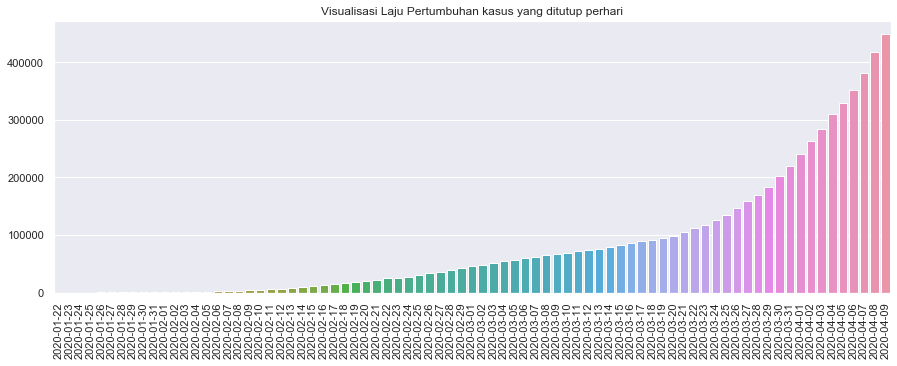

In [61]:
plt.figure(figsize=(15,5))
sns.barplot(x=datewise.index.date, y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Visualisasi Laju Pertumbuhan kasus yang ditutup perhari")
plt.xticks(rotation=90)

### <span style="color:red"> Kasus ditutup  </span>= Kasus yang sudah di-recovered + Kasus kematian 

- <code style="background:yellow;color:black">Peningkatan jumlah Kasus ditutup pada grafik diatas bisa berarti lebih banyak pasien yang sembuh dari penyakit atau lebih banyak orang meninggal karena COVID-19. Peningkatan terjadi lebih dini dibandingkan dengan Laju Pertumbuhan Kasus aktif pada analisa sebelum ini.</code>

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, **kwargs)>

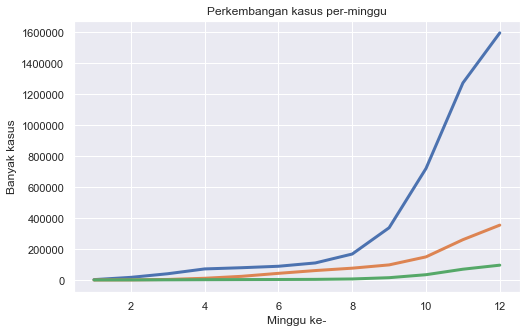

In [79]:
datewise["WeekOfYear"]=datewise.index.weekofyear

week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
w=1
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1

plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3)
plt.plot(week_num,weekwise_recovered,linewidth=3)
plt.plot(week_num,weekwise_deaths,linewidth=3)
plt.ylabel("Banyak kasus")
plt.xlabel("Minggu ke-")
plt.title("Perkembangan kasus per-minggu")
plt.xlabel

### <span style="color:red"> Keterangan grafik - Perkembangan kasus per-minggu </span> 
- <span style="color:blue">kasus di-konfirmasi </span>
- <span style="color:orange">Kasus di-recovered </span>
- <span style="color:green">Kasus kematian </span>

Text(0.5, 1.0, 'kasus kematian perminggu')

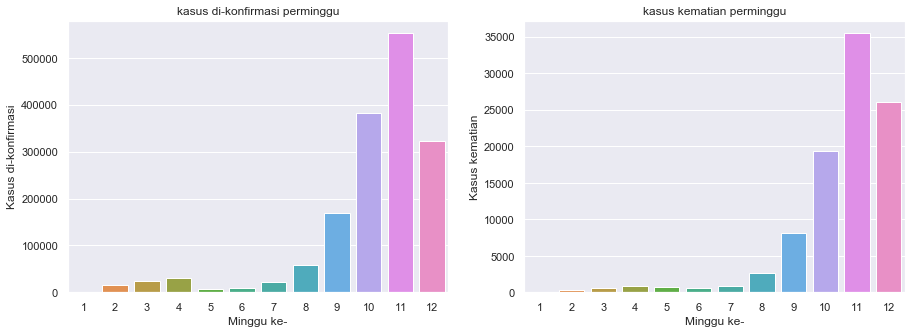

In [63]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num,y=pd.Series(weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Minggu ke-")
ax2.set_xlabel("Minggu ke-")
ax1.set_ylabel("Kasus di-konfirmasi")
ax2.set_ylabel("Kasus kematian")
ax1.set_title("kasus di-konfirmasi perminggu")
ax2.set_title("kasus kematian perminggu")

### <span style="color:red"> Keterangan grafik - Kasus di-konfirmasi dan kasus kematian perminggu  </span>

- <code style="background:yellow;color:black">Pada minggu ke-11, kasus yang di-konfirmasi dan kasus kematian meningkat, namun pada minggu ke-12 grafik melandai.</code>

<code style="background:black;color:white"> Tingkat pertumbuhan dari kasus di-konfirmasi, kasus di-recovered dan kasus kematian.</code>

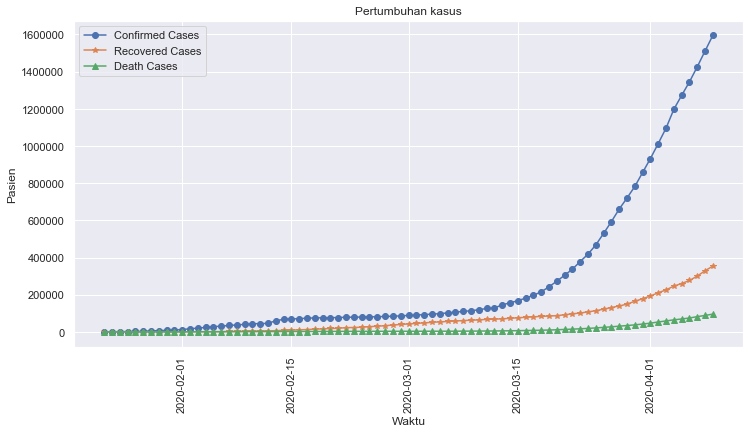

In [64]:
plt.figure(figsize=(12,6))
plt.plot(datewise["Confirmed"],marker="o",label="Confirmed Cases")
plt.plot(datewise["Recovered"],marker="*",label="Recovered Cases")
plt.plot(datewise["Deaths"],marker="^",label="Death Cases")
plt.ylabel("Pasien")
plt.xlabel("Waktu")
plt.xticks(rotation=90)
plt.title("Pertumbuhan kasus")
plt.legend()

### <span style="color:red"> Keterangan grafik - Pertumbuhan kasus </span>

- <code style="background:yellow;color:black">Laju petumbuhan kasus yang dikonfirmasi sangat cepat, ini dikarenakan penyebaran virus COVID-19 yang tergolong sangat cepat. April ini sudah hampir 40000 orang yang sudah di-recovered sedangkan untuk kematian hampir mencapai 20000</code>

<code style="background:black;color:white"> Mortality dan Recovery Rate analysis di seluruh dunia. 
    <code style="background:black;color:white"> - Mortality rate adalah tingkat kematian (Kematian/konfirmasi)*100
    <code style="background:black;color:white"> - Recovery rate adalah tingkat kesembuhan (Recovered/konfirmasi)*100</span>

Rata-rata Mortality Rate 3.4806704847250756
Median Mortality Rate 3.4030738233595836
Rata-rata Recovery Rate 25.003797146098126
Median Recovery Rate 21.312515699157863


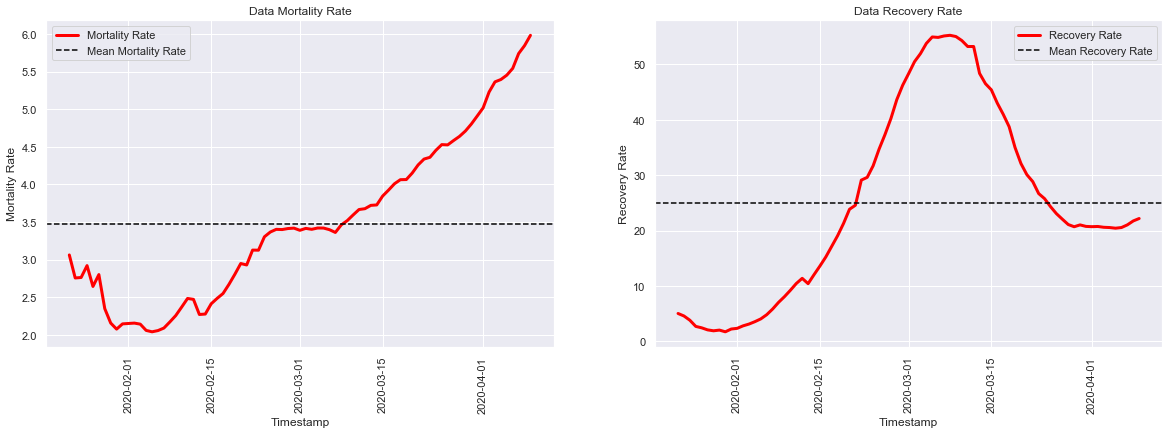

In [65]:
#Menghitung Mortality Rate dan Recovery Rate
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

#Plotting Mortality dan Recovery Rate 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate',linewidth=3,color='red')
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Data Mortality Rate")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise["Recovery Rate"],label="Recovery Rate",linewidth=3,color='red')
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Data Recovery Rate")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    
print("Rata-rata Mortality Rate",datewise["Mortality Rate"].mean())
print("Median Mortality Rate",datewise["Mortality Rate"].median())
print("Rata-rata Recovery Rate",datewise["Recovery Rate"].mean())
print("Median Recovery Rate",datewise["Recovery Rate"].median())

### <span style="color:red"> Keterangan Grafik - Mortality rate & Recovery rate  </span>

- <code style="background:yellow;color:black">Grafik mortality rate masih menanjak, sedangkan recovery rate mengalami penurunan yang cukup signifikan. Ini adalah alasan mengapa jumlah kasus aktif meningkat, sedangkan peningkatan kasus yang ditutup erat kaitannya dengan mortality rate. Jelas bahwa mortality rate merupakan indikasi meningkatkan jumlah kasus kematian. Mean untuk mortality rate ada di angka 3.5, butuh sedikit usaha untuk melandaikan grafik ini. Lalu, mean recovery rate berada di angka 25. Dimana grafik sudah mulai menurun ke angka mean.</code>

Rata-rata kasus di-konfirmasi:  20187.0
Rata-rata kasus di-recovered:  4480.0
Rata-rata kasus kematian:  1208.0


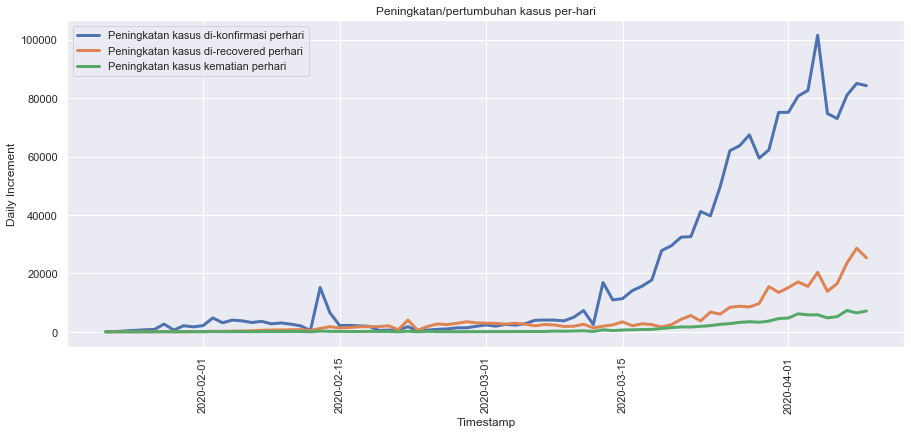

In [66]:
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Peningkatan kasus di-konfirmasi perhari",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Peningkatan kasus di-recovered perhari",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Peningkatan kasus kematian perhari",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Peningkatan/pertumbuhan kasus per-hari")
plt.xticks(rotation=90)
plt.legend()

print("Rata-rata kasus di-konfirmasi: ",np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Rata-rata kasus di-recovered: ",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Rata-rata kasus kematian: ",np.round(datewise["Deaths"].diff().fillna(0).mean()))

### <span style="color:red"> Keterangan Grafik - Pertumbuhan kasus per-hari </span>

- <code style="background:yellow;color:black">Faktor pertumbuhan kasus. Untuk menghitung pertumbuhan kasus digunakan perhitungan sebagai berikut = Kasus terbaru/kasus hari sebelumnya. menunjukkan peningkatan kasus correspoding,  Grafik menurun menunjukan  tanda positif, sedangkan faktor pertumbuhan konstan di atas adalah tanda pertumbuhan eksponensial,  konstan artinya grafik stabil menunjukkan tidak ada perubahan dalam kasus apa pun</code>

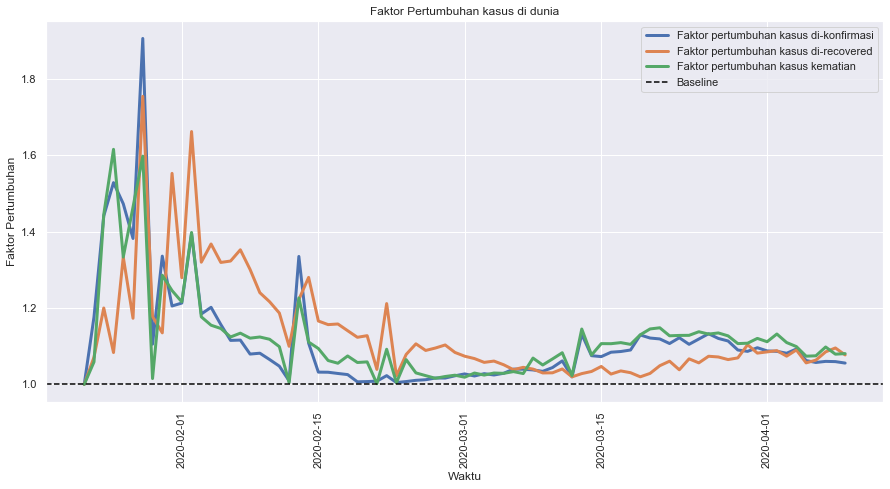

In [67]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Faktor pertumbuhan kasus di-konfirmasi",linewidth=3)
plt.plot(datewise.index,daily_increase_recovered,label="Faktor pertumbuhan kasus di-recovered",linewidth=3)
plt.plot(datewise.index,daily_increase_deaths,label="Faktor pertumbuhan kasus kematian",linewidth=3)
plt.xlabel("Waktu")
plt.ylabel("Faktor Pertumbuhan")
plt.title("Faktor Pertumbuhan kasus di dunia")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()

### <span style="color:red"> Keterangan Grafik - Pertumbuhan kasus diatas baseline (1) </span>

- <code style="background:yellow;color:black">Pertumbuhan kasus yang terus-menerus di atas baseline(1) adalah indikasi yang jelas tentang peningkatan Eksponensial dalam semua bentuk kasus baik yang sudah di-konfirmasi, di-recovered maupun kasus kematian.</code>

## <code style="background:Green;color:white"> Analysis by Country

<code style="background:black;color:white"> Menghitung Mortality rate dan Recovery rate per-negara

In [68]:
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()].groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'}).sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

<code style="background:black;color:white"> Data terbaru negara dengan mortality dan recovery rate 

In [69]:
countrywise

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
US,461437.0,25410.0,16478.0,3.571018,5.506711
Spain,153222.0,52165.0,15447.0,10.081450,34.045372
Italy,143626.0,28470.0,18279.0,12.726804,19.822316
France,118781.0,23413.0,12228.0,10.294576,19.711065
Germany,118181.0,52407.0,2607.0,2.205938,44.344692
...,...,...,...,...,...
Sao Tome and Principe,4.0,0.0,0.0,0.000000,0.000000
Burundi,3.0,0.0,0.0,0.000000,0.000000
South Sudan,3.0,0.0,0.0,0.000000,0.000000


<code style="background:black;color:white"> 5 negara dengan kasus di-konfirmasi dan kasus kematian terbanyak

Text(0.5, 1.0, 'Top 5 countries as per Number of Death Cases')

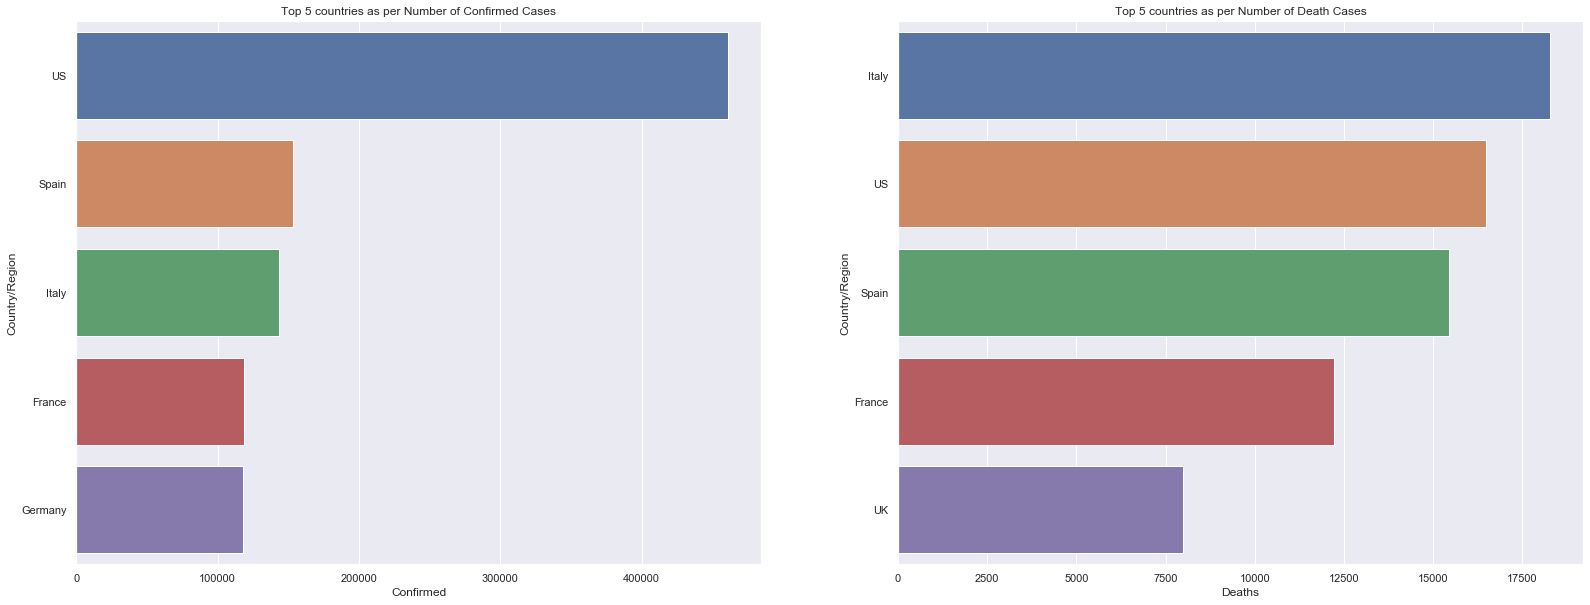

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
top_5_confirmed=countrywise.sort_values(["Confirmed"],ascending=False).head(5)
top_5_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(5)
sns.barplot(x=top_5_confirmed["Confirmed"],y=top_5_confirmed.index,ax=ax1)
sns.barplot(x=top_5_deaths["Deaths"],y=top_5_deaths.index,ax=ax2)
sns.set(style="darkgrid")
ax1.set_title("Top 5 countries as per Number of Confirmed Cases")
ax2.set_title("Top 5 countries as per Number of Death Cases")

### <span style="color:red"> Keterangan Grafik - 5 negara kasus di-konfirmasi dan kasus kematian terbanyak</span>

- <code style="background:yellow;color:black">Faktor yang mungkin menyebabkan negara diatas menjadi 5 negara paling terkena dampak COVID-19 adalah pada link berikut (1)Tourist Data: https://worldpopulationreview.com/countries/most-visited-countries/ (2)International Students Data: https://www.easyuni.com/advice/top-countries-with-most-international-students-1184/ .Jika kita memeriksa daftar negara yang sesuai dengan jumlah wisatawan yang berkunjung dari tautan yang disebutkan di atas, negara-negara utama adalah Perancis, Spanyol, AS, Cina, Italia, Meksiko, Inggris, Turki, Jerman, Thailand. Hal lain yang perlu dipertimbangkan sebagian besar negara yang disebutkan di atas juga memiliki jumlah Siswa Internasional terbanyak. Semua dari mereka adalah negara yang paling terkena dampak karena COVID-19.</code>

<code style="background:black;color:white"> 15 Negara teratas berdasarkan  Mortatlity Rate dan Recovery Rate dengan lebih dari 500 kasus di-konfirmasi.

Text(0.5, 0, 'Recovery (in Percentage)')

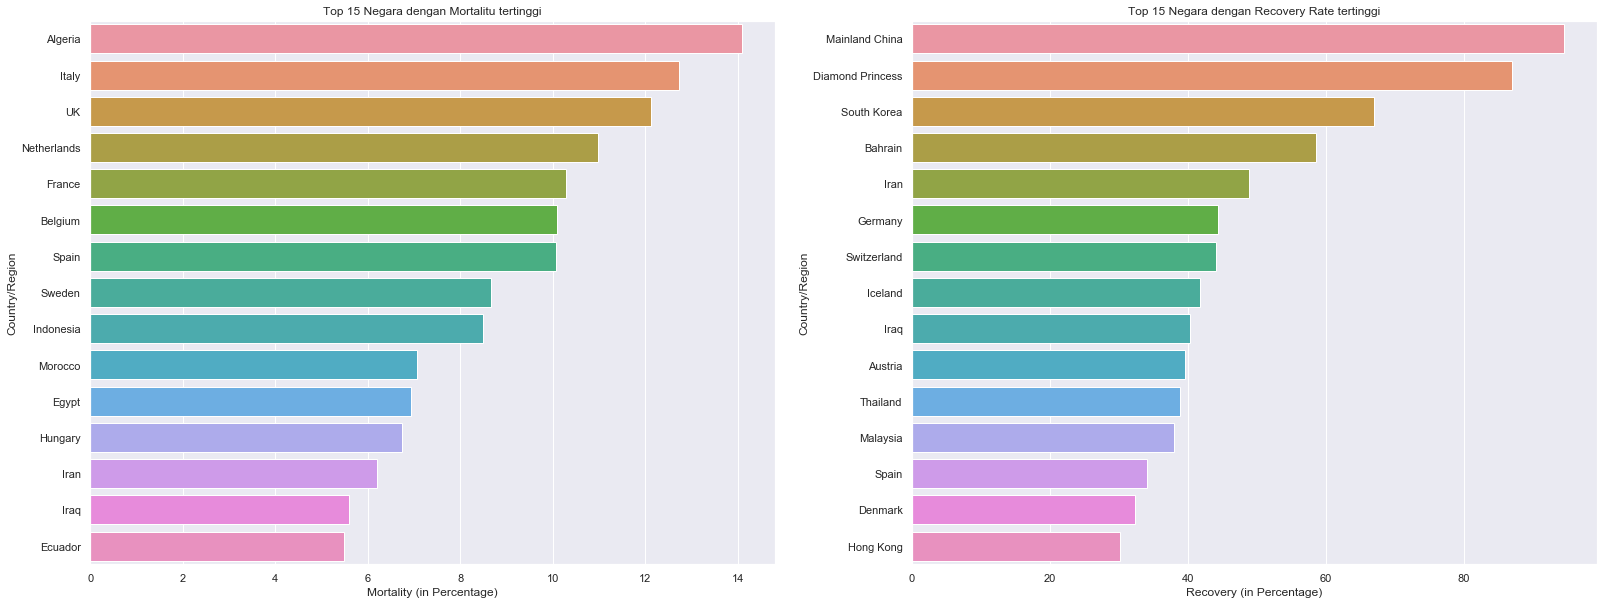

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
countrywise_plot_mortal=countrywise[countrywise["Confirmed"]>500].sort_values(["Mortality"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_mortal["Mortality"],y=countrywise_plot_mortal.index,ax=ax1)
ax1.set_title("Top 15 Negara dengan Mortalitu tertinggi")
ax1.set_xlabel("Mortality (in Percentage)")
countrywise_plot_recover=countrywise[countrywise["Confirmed"]>500].sort_values(["Recovery"],ascending=False).head(15)
sns.barplot(x=countrywise_plot_recover["Recovery"],y=countrywise_plot_recover.index, ax=ax2)
ax2.set_title("Top 15 Negara dengan Recovery Rate tertinggi")
ax2.set_xlabel("Recovery (in Percentage)")

In [72]:
no_recovered_countries=countrywise[(countrywise["Confirmed"]>50)&(countrywise["Recovered"]==0)][["Confirmed","Deaths"]]
no_recovered_countries["Mortality Rate"]=(no_recovered_countries["Deaths"]/no_recovered_countries["Confirmed"])*100
no_recovered_countries[no_recovered_countries["Mortality Rate"]>0].sort_values(["Mortality Rate"],ascending=False)

,Confirmed,Deaths,Mortality Rate
Country/Region,,,
Serbia,2867.0,66.0,2.302058


- <code style="background:yellow;color:black">Serbia adalah negara dengan Mortality rate yang cukup tinggi karena jumlah kasus di-konfirmasi jauh di atas 1000 dengan jumlah Mortality rate yang cukup banyak tanpa pasien yang Sembuh.

<code style="background:black;color:white">Negara-negara dengan lebih dari 100 Kasus di-konfirmasi dan Tidak Ada Kematian dengan Recovery rate yang sangat tinggi.

In [73]:
no_deaths=countrywise[(countrywise["Confirmed"]>100)&(countrywise["Deaths"]==0)]
no_deaths[no_deaths["Recovery"]>0].sort_values(["Recovery"],ascending=False).drop(["Mortality"],1)

,Confirmed,Recovered,Deaths,Recovery
Country/Region,,,,
Cambodia,119.0,62.0,0.0,52.100840
Vietnam,255.0,128.0,0.0,50.196078
Djibouti,135.0,25.0,0.0,18.518519
Rwanda,110.0,7.0,0.0,6.363636
Guinea,194.0,11.0,0.0,5.670103


- <code style="background:yellow;color:black">Vietnam mampu mengahadapi COVID-19 dengan cukup baik tanpa Kematian yang tercatat sejauh ini dengan Recovery rate yang cukup sehat. Vietnam adalah negara pertama yang memberi tahu Organisasi Kesehatan Dunia tentang Transmisi Manusia ke Manusia dari COVID-19.

Text(0.5, 1.0, 'Top 15 Negara dengan kasus non-aktif terbanyak')

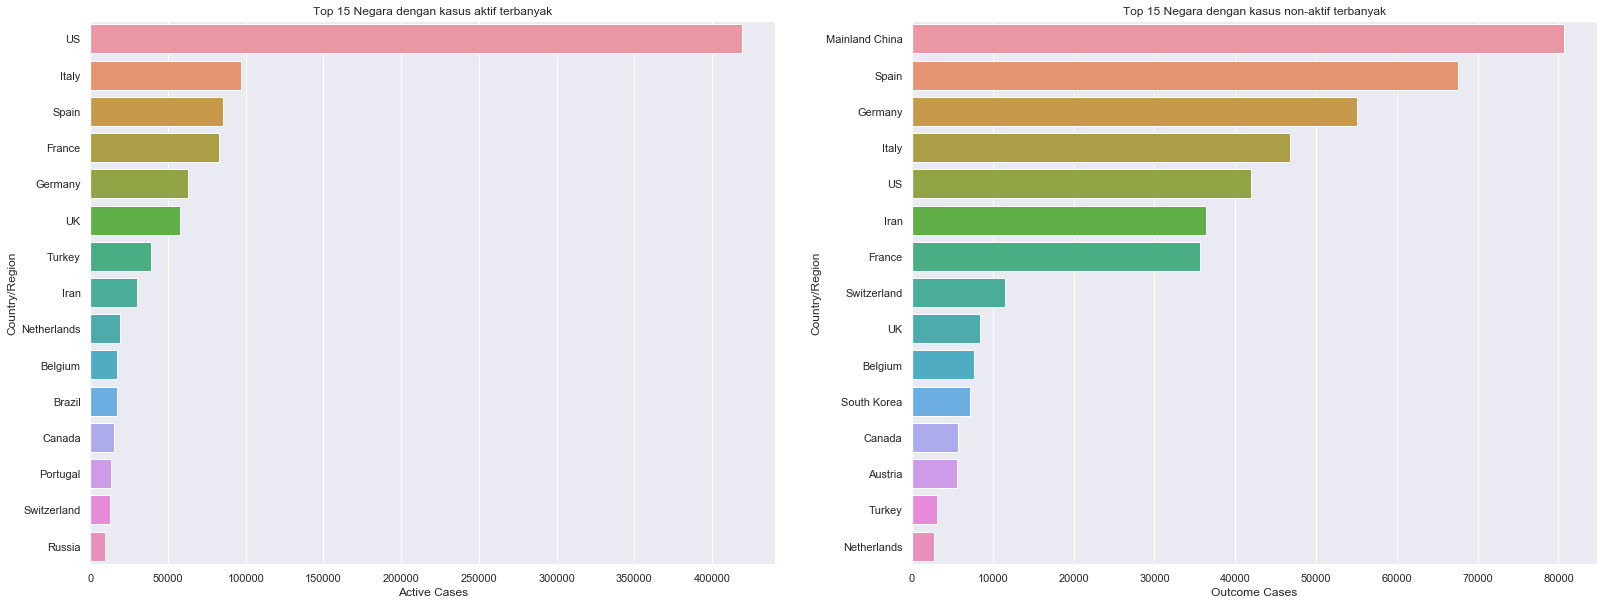

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
countrywise["Active Cases"]=(countrywise["Confirmed"]-countrywise["Recovered"]-countrywise["Deaths"])
countrywise["Outcome Cases"]=(countrywise["Recovered"]+countrywise["Deaths"])
top_15_active=countrywise.sort_values(["Active Cases"],ascending=False).head(15)
top_15_outcome=countrywise.sort_values(["Outcome Cases"],ascending=False).head(15)
sns.barplot(x=top_15_active["Active Cases"],y=top_15_active.index,ax=ax1)
sns.barplot(x=top_15_outcome["Outcome Cases"],y=top_15_outcome.index,ax=ax2)
ax1.set_title("Top 15 Negara dengan kasus aktif terbanyak")
ax2.set_title("Top 15 Negara dengan kasus non-aktif terbanyak")

In [26]:
country_date=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
confirm_rate=[]
for country in countrywise.index:
    days=country_date.ix[country].shape[0]
    confirm_rate.append((countrywise.ix[country]["Confirmed"])/days)
countrywise["Kasus di-konfirmasi/Hari"]=confirm_rate

<code style="background:black;color:white">Negara-negara dengan kasus di-konfirmasi tertinggi dan terendah per-hari

Text(0.5, 1.0, 'Top 15 negara dengan kasus di-konfirmasi terendah per-hari')

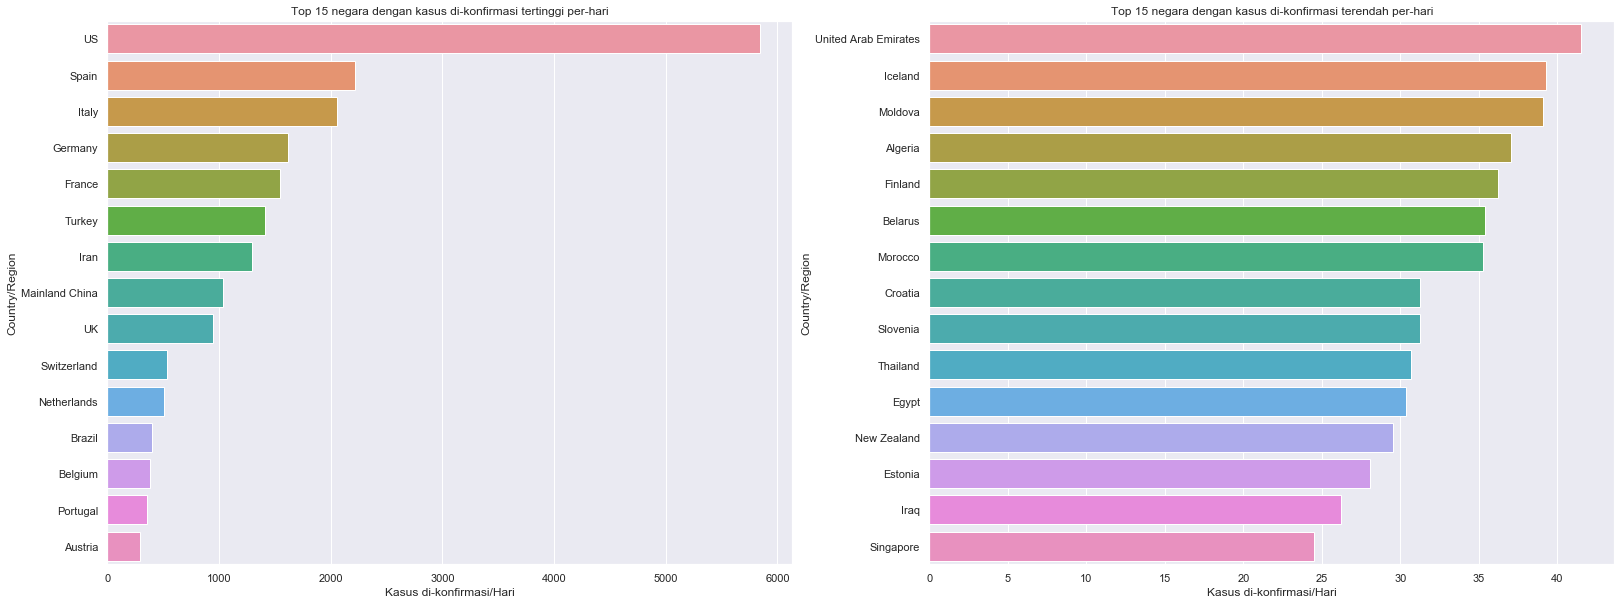

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,10))
top_15_ccpd=countrywise.sort_values(["Kasus di-konfirmasi/Hari"],ascending=False).head(15)
sns.barplot(y=top_15_ccpd.index,x=top_15_ccpd["Kasus di-konfirmasi/Hari"],ax=ax1)
ax1.set_title("Top 15 negara dengan kasus di-konfirmasi tertinggi per-hari")
bottom_15_ccpd=countrywise[countrywise["Confirmed"]>1000].sort_values(["Kasus di-konfirmasi/Hari"],ascending=False).tail(15)
sns.barplot(y=bottom_15_ccpd.index,x=bottom_15_ccpd["Kasus di-konfirmasi/Hari"],ax=ax2)
ax2.set_title("Top 15 negara dengan kasus di-konfirmasi terendah per-hari")

### <span style="color:red"> Keterangan Grafik - 15 negara kasus di-konfirmasi tertinggi dan terendah per-hari</span>

- <code style="background:yellow;color:black">Cina Daratan telah mencatat jumlah Closes cases tertinggi karena Recovery rate mereka mengejutkan mencatat 85% +, alasan mengapa Italia telah menempati peringkat kedua di antara negara-negara dengan jumlah Closed cases tertinggi adalah karena jumlah Kematian di Italia, Death rate di Italia adalah 10% + di mana COVID-19 memiliki Death rate 2-3%. Confirmed cases/day yang Dikonfirmasi adalah indikasi yang jelas mengapa US memiliki jumlah Active cases tertinggi saat ini. Ada  5000+ kasus per hari. Peningkatan terus terjadi setiap hari. </code>

Mean Survival Probability across all countries 96.01829772698453
Median Survival Probability across all countries 97.73873333803513
Mean Death Probability across all countries 3.981702273015472
Median Death Probability across all countries 2.261266661964868


Text(0.5, 1.0, 'Bottom 15 Countries as per Survival Probability')

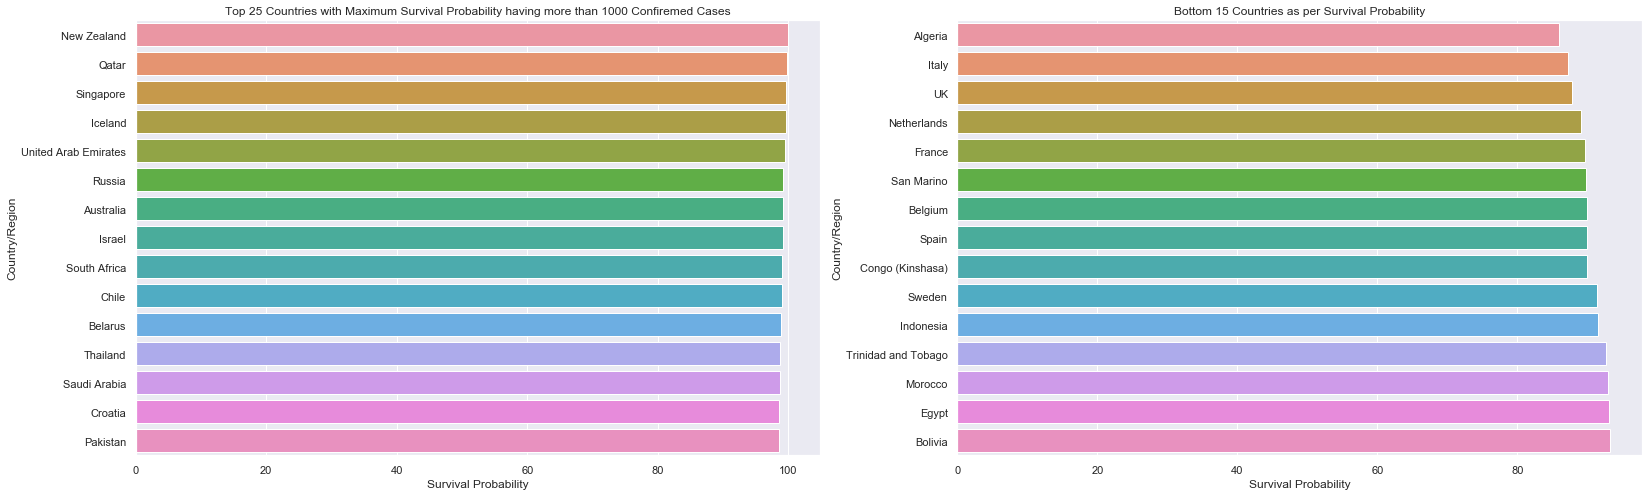

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(27,8))
countrywise["Survival Probability"]=(1-(countrywise["Deaths"]/countrywise["Confirmed"]))*100
top_25_survival=countrywise[countrywise["Confirmed"]>1000].sort_values(["Survival Probability"],ascending=False).head(15)
sns.barplot(x=top_25_survival["Survival Probability"],y=top_25_survival.index,ax=ax1)
ax1.set_title("Top 25 Countries with Maximum Survival Probability having more than 1000 Confiremed Cases")
print('Mean Survival Probability across all countries',countrywise["Survival Probability"].mean())
print('Median Survival Probability across all countries',countrywise["Survival Probability"].median())
print('Mean Death Probability across all countries',100-countrywise["Survival Probability"].mean())
print('Median Death Probability across all countries',100-countrywise["Survival Probability"].median())

Bottom_5_countries=countrywise[countrywise["Confirmed"]>100].sort_values(["Survival Probability"],ascending=True).head(15)
sns.barplot(x=Bottom_5_countries["Survival Probability"],y=Bottom_5_countries.index,ax=ax2)
plt.title("Bottom 15 Countries as per Survival Probability")

### <span style="color:red"> Keterangan Grafik - Survival probability</span>

- <code style="background:yellow;color:black">Survival Probability satu-satunya grafik yang terlihat paling menjanjikan! Memiliki probabilitas kelangsungan hidup rata-rata 95% + di semua negara tetapi turun sedikit setiap hari. Perbedaan antara Mean dan Death Probability adalah indikasi yang jelas bahwa ada beberapa negara dengan tingkat kematian yang sangat tinggi mis. Italia, Aljazair, Inggris, dll.. </code>

## <code style="background:Green;color:white"> Perbandingan dari China, Italy, US, Spain, Indonesia dan Seluruh dunia

In [29]:
china_data=covid[covid["Country/Region"]=="Mainland China"]
Italy_data=covid[covid["Country/Region"]=="Italy"]
US_data=covid[covid["Country/Region"]=="US"]
spain_data=covid[covid["Country/Region"]=="Spain"]
indonesia_data=covid[covid["Country/Region"]=="Indonesia"]
rest_of_world=covid[(covid["Country/Region"]!="Mainland China")&(covid["Country/Region"]!="Italy")&(covid["Country/Region"]!="US")&(covid["Country/Region"]!="Spain")]

datewise_china=china_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Italy=Italy_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_US=US_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Spain=spain_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_Indo=indonesia_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise_restofworld=rest_of_world.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

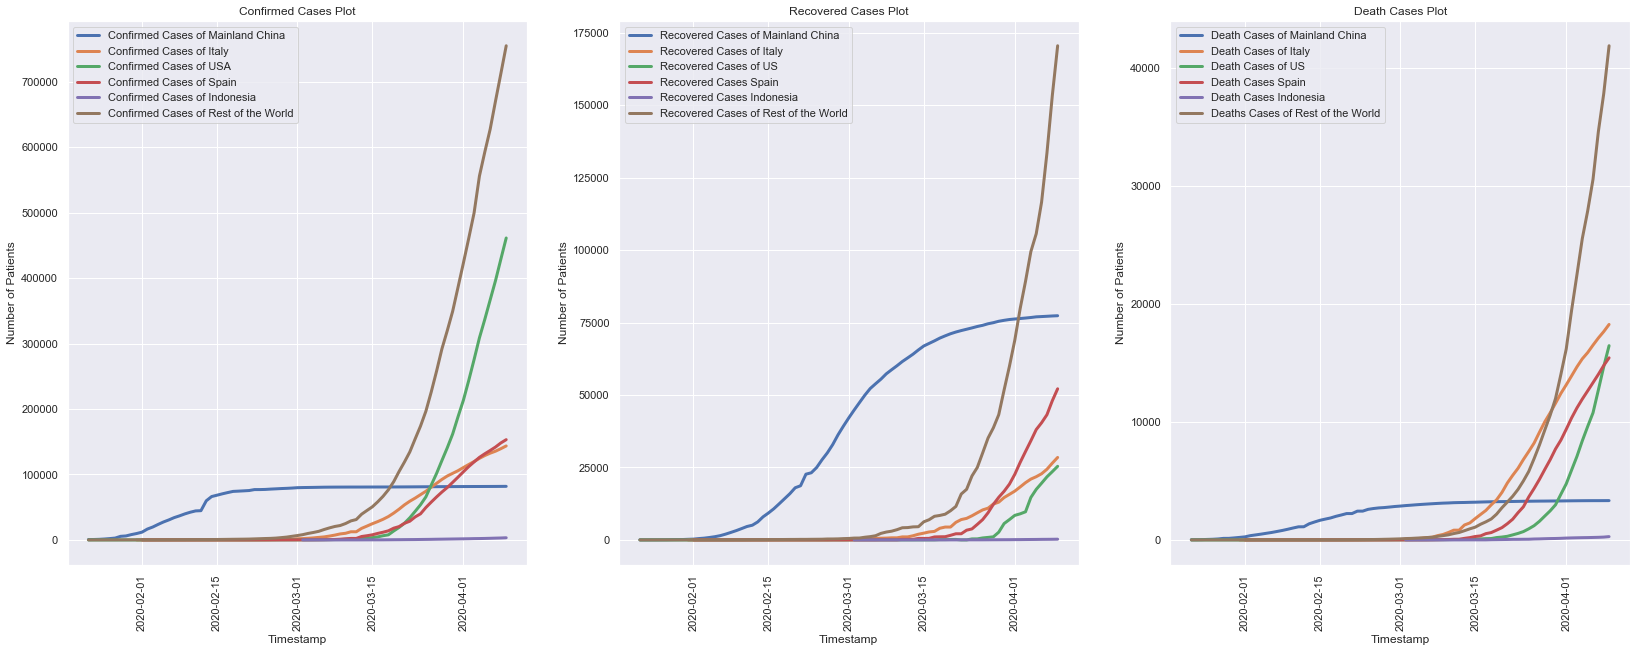

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(28,10))
ax1.plot(datewise_china["Confirmed"],label="Confirmed Cases of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Confirmed"],label="Confirmed Cases of Italy",linewidth=3)
ax1.plot(datewise_US["Confirmed"],label="Confirmed Cases of USA",linewidth=3)
ax1.plot(datewise_Spain["Confirmed"],label="Confirmed Cases of Spain",linewidth=3)
ax1.plot(datewise_Indo["Confirmed"],label="Confirmed Cases of Indonesia",linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"],label="Confirmed Cases of Rest of the World",linewidth=3)
ax1.set_title("Confirmed Cases Plot")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Timestamp")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Recovered"],label="Recovered Cases of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovered"],label="Recovered Cases of Italy",linewidth=3)
ax2.plot(datewise_US["Recovered"],label="Recovered Cases of US",linewidth=3)
ax2.plot(datewise_Spain["Recovered"],label="Recovered Cases Spain",linewidth=3)
ax2.plot(datewise_Indo["Recovered"],label="Recovered Cases Indonesia",linewidth=3)
ax2.plot(datewise_restofworld["Recovered"],label="Recovered Cases of Rest of the World",linewidth=3)
ax2.set_title("Recovered Cases Plot")
ax2.set_ylabel("Number of Patients")
ax2.set_xlabel("Timestamp")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax3.plot(datewise_china["Deaths"],label='Death Cases of Mainland China',linewidth=3)
ax3.plot(datewise_Italy["Deaths"],label='Death Cases of Italy',linewidth=3)
ax3.plot(datewise_US["Deaths"],label='Death Cases of US',linewidth=3)
ax3.plot(datewise_Spain["Deaths"],label='Death Cases Spain',linewidth=3)
ax3.plot(datewise_Indo["Deaths"],label='Death Cases Indonesia',linewidth=3)
ax3.plot(datewise_restofworld["Deaths"],label="Deaths Cases of Rest of the World",linewidth=3)
ax3.set_title("Death Cases Plot")
ax3.set_ylabel("Number of Patients")
ax3.set_xlabel("Timestamp")
ax3.legend()
for tick in ax3.get_xticklabels():
    tick.set_rotation(90)

### <span style="color:red"> Keterangan Grafik - Perbandingan plot grafik antara kasus yang terkonfirmasi, kasus pemulihan dan kasus kematian </span>

- <code style="background:yellow;color:black">Cina telah mampu melakukan "Flatten the Curve" dengan melihat grafik Confirmed cases dan Death cases mereka. Dengan Recovery rate yang mengejutkan. dilihat bahwa jumlah pasien di China yang kasus terkonfirmasi ada kurang dari 100.000 pasien, untuk kasus kematian, China memiliki pasien yang lebih kurang dari 10.000 pasien. </code>
- <code style="background:yellow;color:black">US tampaknya memiliki kontrol yang baik pada Kematian, tetapi jumlah orang yang terkena dampak akan keluar dari yang ditangani.</code>

In [31]:
datewise_china["Mortality"]=(datewise_china["Deaths"]/datewise_china["Confirmed"])*100
datewise_Italy["Mortality"]=(datewise_Italy["Deaths"]/datewise_Italy["Confirmed"])*100
datewise_US["Mortality"]=(datewise_US["Deaths"]/datewise_US["Confirmed"])*100
datewise_Spain["Mortality"]=(datewise_Spain["Deaths"]/datewise_Spain["Confirmed"])*100
datewise_Indo["Mortality"]=(datewise_Indo["Deaths"]/datewise_Indo["Confirmed"])*100
datewise_restofworld["Mortality"]=(datewise_restofworld["Deaths"]/datewise_restofworld["Confirmed"])*100

datewise_china["Recovery"]=(datewise_china["Recovered"]/datewise_china["Confirmed"])*100
datewise_Italy["Recovery"]=(datewise_Italy["Recovered"]/datewise_Italy["Confirmed"])*100
datewise_US["Recovery"]=(datewise_US["Recovered"]/datewise_US["Confirmed"])*100
datewise_Spain["Recovery"]=(datewise_Spain["Recovered"]/datewise_Spain["Confirmed"])*100
datewise_Indo["Recovery"]=(datewise_Indo["Recovered"]/datewise_Indo["Confirmed"])*100
datewise_restofworld["Recovery"]=(datewise_restofworld["Recovered"]/datewise_restofworld["Confirmed"])*100

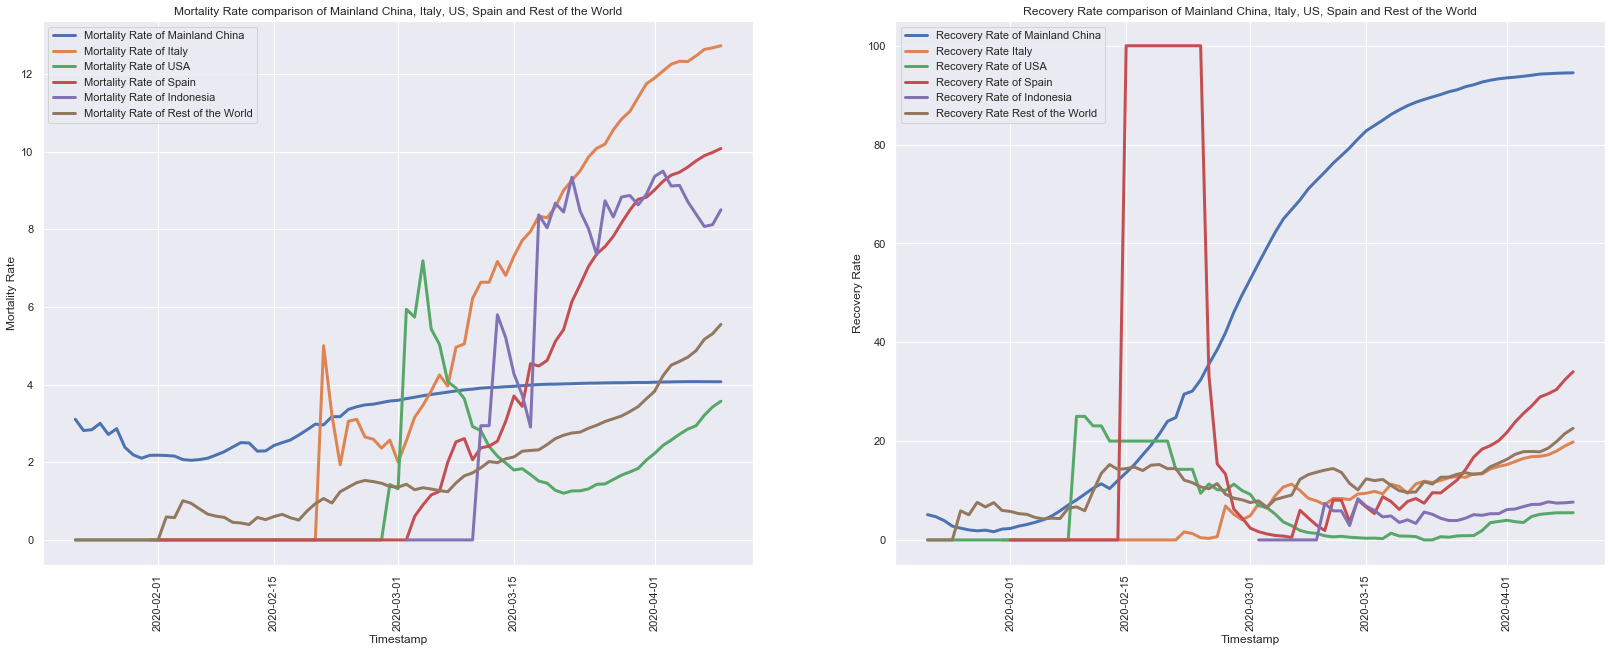

In [32]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(28,10))
ax1.plot(datewise_china["Mortality"],label="Mortality Rate of Mainland China",linewidth=3)
ax1.plot(datewise_Italy["Mortality"],label="Mortality Rate of Italy",linewidth=3)
ax1.plot(datewise_US["Mortality"],label="Mortality Rate of USA",linewidth=3)
ax1.plot(datewise_Spain["Mortality"],label="Mortality Rate of Spain",linewidth=3)
ax1.plot(datewise_Indo["Mortality"],label="Mortality Rate of Indonesia",linewidth=3)
ax1.plot(datewise_restofworld["Mortality"],label="Mortality Rate of Rest of the World",linewidth=3)
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Mortality Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Recovery"],label="Recovery Rate of Mainland China",linewidth=3)
ax2.plot(datewise_Italy["Recovery"],label="Recovery Rate Italy",linewidth=3)
ax2.plot(datewise_US["Recovery"],label="Recovery Rate of USA",linewidth=3)
ax2.plot(datewise_Spain["Recovery"],label="Recovery Rate of Spain",linewidth=3)
ax2.plot(datewise_Indo["Recovery"],label="Recovery Rate of Indonesia",linewidth=3)
ax2.plot(datewise_restofworld["Recovery"],label="Recovery Rate Rest of the World",linewidth=3)
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Recovery Rate comparison of Mainland China, Italy, US, Spain and Rest of the World")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

### <span style="color:red"> Keterangan Grafik - Perbandingan grafik antara Mortality rate dan Recovery rate </span>

- <code style="background:yellow;color:black">Melepas Recovery rate Spanyol adalah pertanda baik tetapi tidak ada apa-apanya dibandingkan dengan Death rate. Ini adalah pertanda yang mengkhawatirkan bagi US karena Recovery rate menurun dengan Death rate mulai berkurang</code>

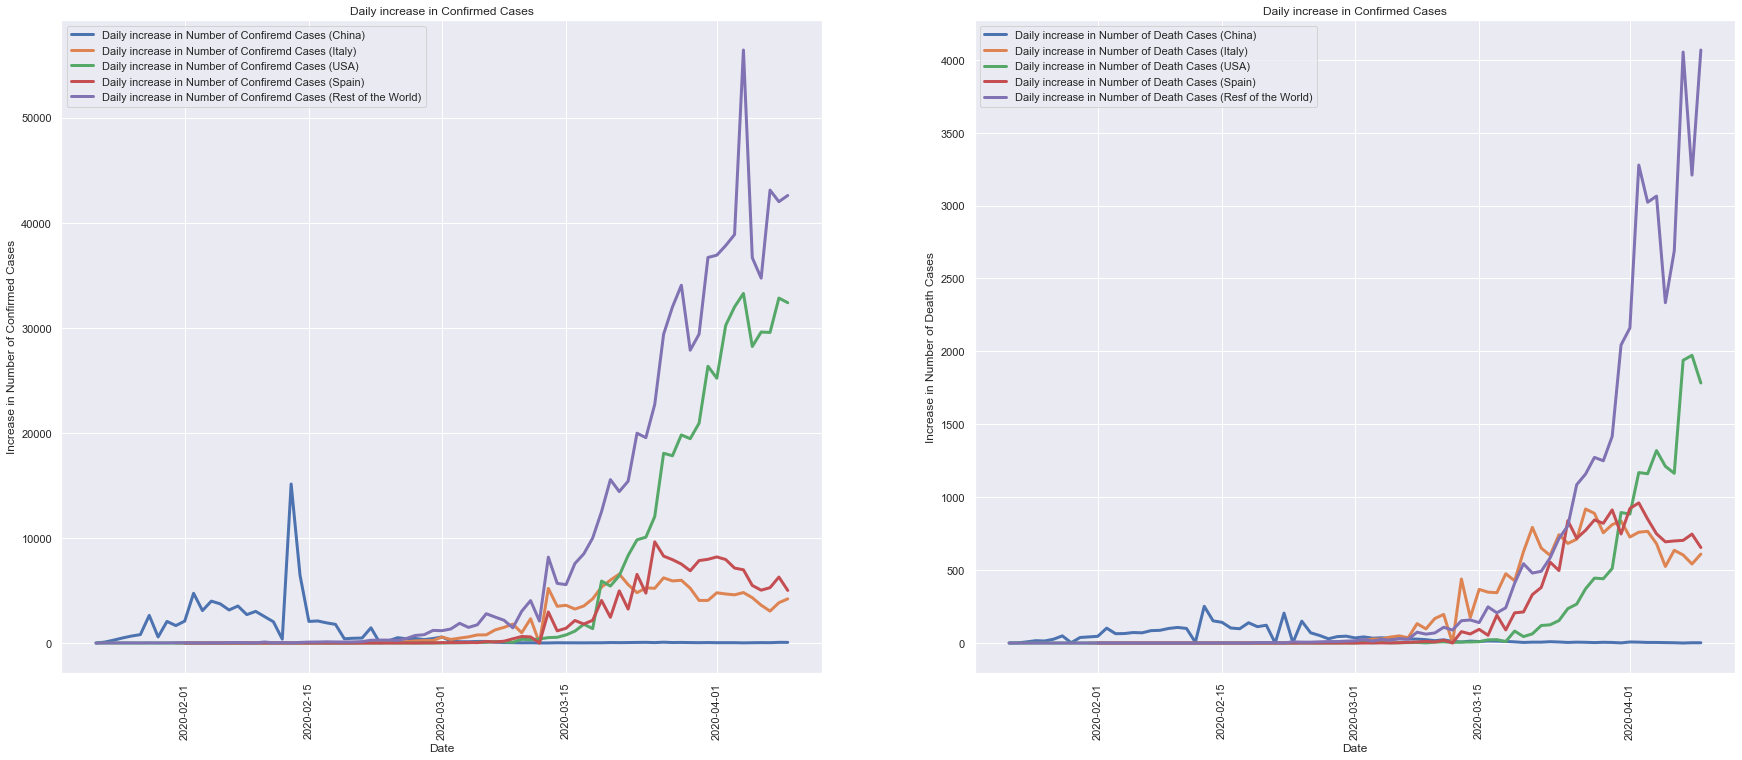

In [33]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(30,12))
ax1.plot(datewise_china["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (China)',linewidth=3)
ax1.plot(datewise_Italy["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Italy)',linewidth=3)
ax1.plot(datewise_US["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (USA)',linewidth=3)
ax1.plot(datewise_Spain["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Spain)',linewidth=3)
ax1.plot(datewise_restofworld["Confirmed"].diff().fillna(0),label='Daily increase in Number of Confiremd Cases (Rest of the World)',linewidth=3)
ax1.set_xlabel('Date')
ax1.set_ylabel("Increase in Number of Confirmed Cases")
ax1.set_title("Daily increase in Confirmed Cases")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
ax2.plot(datewise_china["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (China)',linewidth=3)
ax2.plot(datewise_Italy["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Italy)',linewidth=3)
ax2.plot(datewise_US["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (USA)',linewidth=3)
ax2.plot(datewise_Spain["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Spain)',linewidth=3)
ax2.plot(datewise_restofworld["Deaths"].diff().fillna(0),label='Daily increase in Number of Death Cases (Resf of the World)',linewidth=3)
ax2.set_xlabel('Date')
ax2.set_ylabel("Increase in Number of Death Cases")
ax2.set_title("Daily increase in Confirmed Cases")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

### <span style="color:red"> Keterangan Grafik - Perbandingan grafik harian untuk kasus yang terkonfirmasi dengan kasus kematian</span>


- <code style="background:yellow;color:black">Penurun grafik pada Spanyol dan Italy adalah peningkatkan harian dalam jumlah kasus yang terkonfirmasi, dan penurunan kasus kematian harian. ini adalah tanda yang sedikit positif.</code>

##  <code style="background:Green;color:white">Analisa Data COVID-19 Indonesia  

<code style="background:black;color:white"> Data COVID-19 Indonesia per-tanggal 09 April 2020.</code>

In [34]:
indonesia_data=covid[covid["Country/Region"]=="Indonesia"]
datewise_indo=indonesia_data.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
print(datewise_indo.iloc[-1])
print("Total Kasus Aktif: ",datewise_indo["Confirmed"].iloc[-1]-datewise_indo["Recovered"].iloc[-1]-datewise_indo["Deaths"].iloc[-1])
print("Total Kasus Non-Aktif: ",datewise_indo["Recovered"].iloc[-1]+datewise_indo["Deaths"].iloc[-1])

Confirmed    3293.0
Recovered     252.0
Deaths        280.0
Name: 2020-04-09 00:00:00, dtype: float64
Total Kasus Aktif:  2761.0
Total Kasus Non-Aktif:  532.0


- <code style="background:yellow;color:black">Kasus di-konfirmasi pertanggal 09 April 2020 ada 3293, di-recovered 252 dan kasus kematian mencapai 280. Kasus aktif sebanyak 2761 dan kasus non-aktif 532.</code>

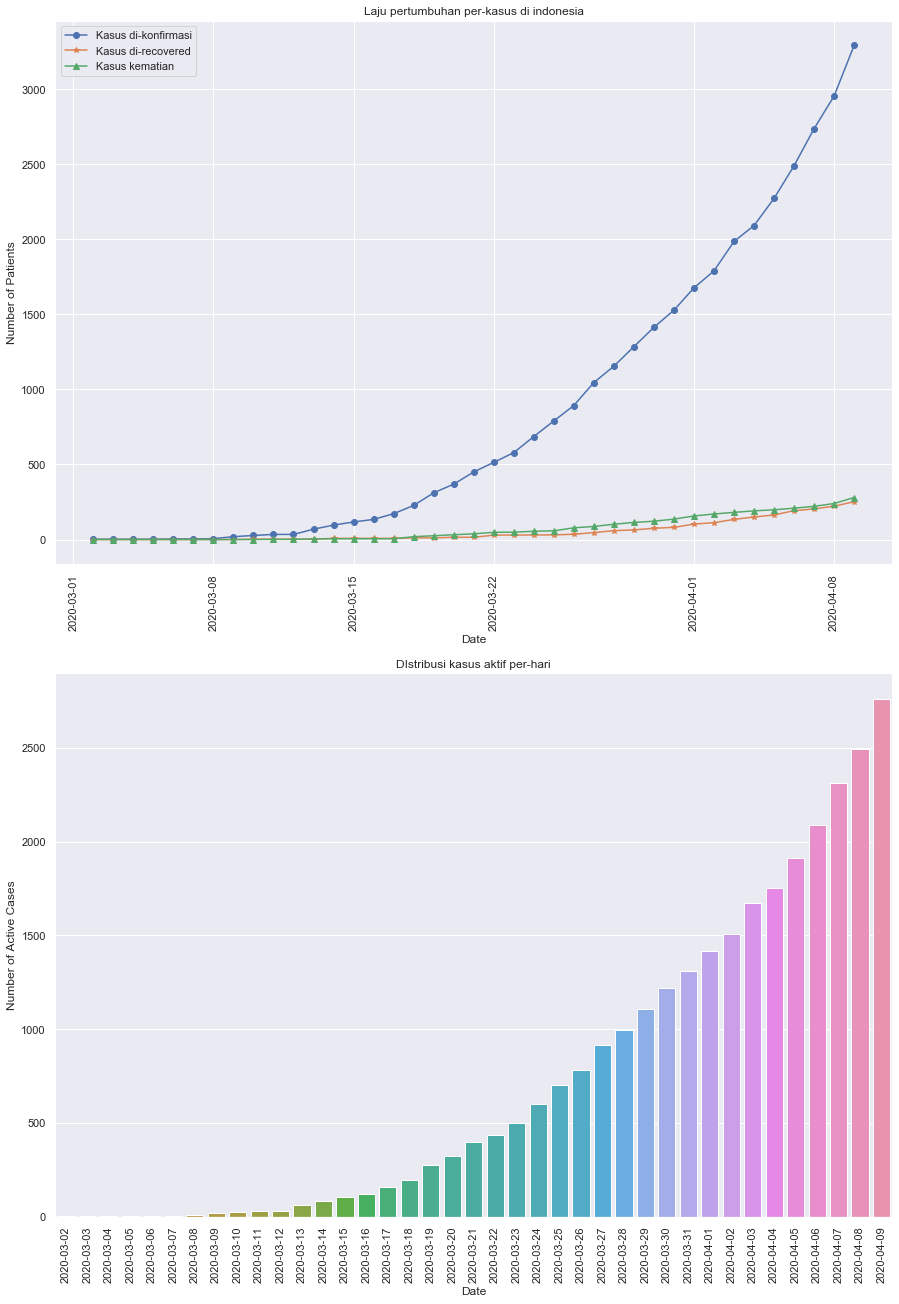

In [35]:
fig, (ax1,ax2) = plt.subplots(2, 1,figsize=(15,22))
ax1.plot(datewise_indo["Confirmed"],marker='o',label="Kasus di-konfirmasi")
ax1.plot(datewise_indo["Recovered"],marker='*',label="Kasus di-recovered")
ax1.plot(datewise_indo["Deaths"],marker='^',label="Kasus kematian")
ax1.set_ylabel("Number of Patients")
ax1.set_xlabel("Date")
ax1.legend()
ax1.set_title("Laju pertumbuhan per-kasus di indonesia")
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
sns.barplot(datewise_indo.index.date,datewise_indo["Confirmed"]-datewise_indo["Recovered"]-datewise_indo["Deaths"],ax=ax2)
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Active Cases")
ax2.set_title("DIstribusi kasus aktif per-hari")
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)

### <span style="color:red"> Keterangan Grafik - Laju Pertumbuhan dan Distrbusi perhari</span>

- <code style="background:yellow;color:black">Grafik laju pertumbuhan kasus di indonesia, Grafik ke 2 menunjukan distribusi angka kasus aktif yang terus melonjak per-hari. </code>

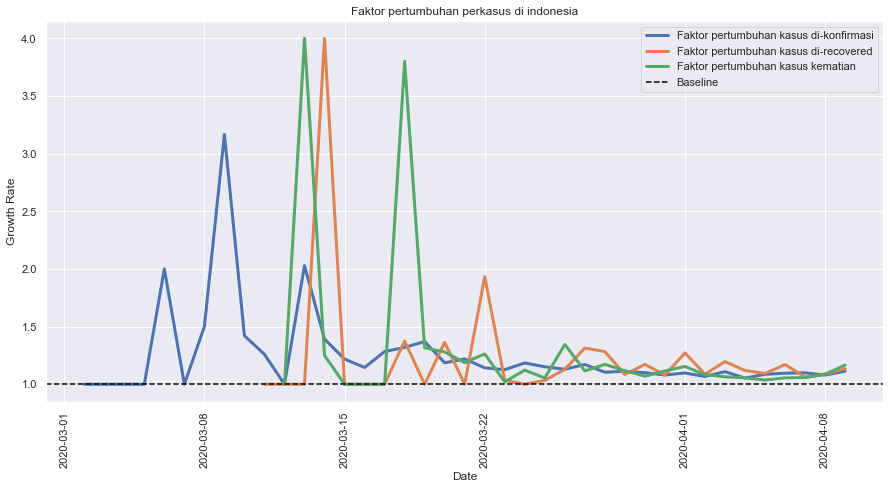

In [36]:
indo_increase_confirm=[]
indo_increase_recover=[]
indo_increase_deaths=[]
for i in range(datewise_indo.shape[0]-1):
    indo_increase_confirm.append(((datewise_indo["Confirmed"].iloc[i+1])/datewise_indo["Confirmed"].iloc[i]))
    indo_increase_recover.append(((datewise_indo["Recovered"].iloc[i+1])/datewise_indo["Recovered"].iloc[i]))
    indo_increase_deaths.append(((datewise_indo["Deaths"].iloc[i+1])/datewise_indo["Deaths"].iloc[i]))
indo_increase_confirm.insert(0,1)
indo_increase_recover.insert(0,1)
indo_increase_deaths.insert(0,1)

plt.figure(figsize=(15,7))
plt.plot(datewise_indo.index,indo_increase_confirm,label="Faktor pertumbuhan kasus di-konfirmasi",linewidth=3)
plt.plot(datewise_indo.index,indo_increase_recover,label="Faktor pertumbuhan kasus di-recovered",linewidth=3)
plt.plot(datewise_indo.index,indo_increase_deaths,label="Faktor pertumbuhan kasus kematian",linewidth=3)
plt.axhline(1,linestyle='--',color="black",label="Baseline")
plt.xticks(rotation=90)
plt.title("Faktor pertumbuhan perkasus di indonesia")
plt.ylabel("Growth Rate")
plt.xlabel("Date")
plt.legend()

### <span style="color:red"> Faktor pertumbuhan perkasus di indonesia dan garis basline</span>

- <code style="background:yellow;color:black">Terlihat kemajuan pada beberapa hari terkhir, walaupun angka belum mendekati baseline(1). </code>

Rata-rata kenaikan angka kasus di-konfirmasi setiap hari:  84.0
Rata-rata kenaikan angka kasus di-recovered setiap hari:  6.0
Rata-rata kenaikan angka kasus kematian setiap hari:  7.0


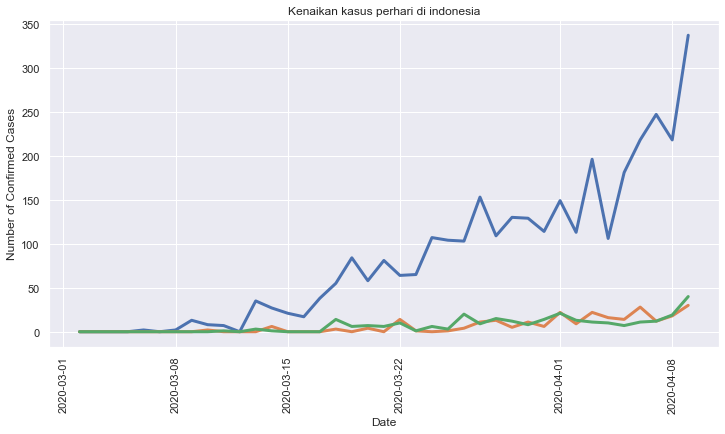

In [37]:
plt.figure(figsize=(12,6))
plt.plot(datewise_indo["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3)
plt.plot(datewise_indo["Recovered"].diff().fillna(0),label="Daily increase in Recovered Cases",linewidth=3)
plt.plot(datewise_indo["Deaths"].diff().fillna(0),label="Daily increase in Deaths Cases",linewidth=3)
plt.ylabel("Number of Confirmed Cases")
plt.xlabel("Date")
plt.title("Kenaikan kasus perhari di indonesia")
plt.xticks(rotation=90)


print("Rata-rata kenaikan angka kasus di-konfirmasi setiap hari: ",np.round(datewise_Indo["Confirmed"].diff().fillna(0).mean()))
print("Rata-rata kenaikan angka kasus di-recovered setiap hari: ",np.round(datewise_Indo["Recovered"].diff().fillna(0).mean()))
print("Rata-rata kenaikan angka kasus kematian setiap hari: ",np.round(datewise_Indo["Deaths"].diff().fillna(0).mean()))

### <span style="color:red"> Keterangan Grafik - Kenaikan kasus perhari di indonesia</span>

- <code style="background:yellow;color:black">Rata-rata kasus baru perhari mencapai 84 kasus, 6 kasus berhasil di-recovered dan 7 kasus kematian. </code>

No handles with labels found to put in legend.


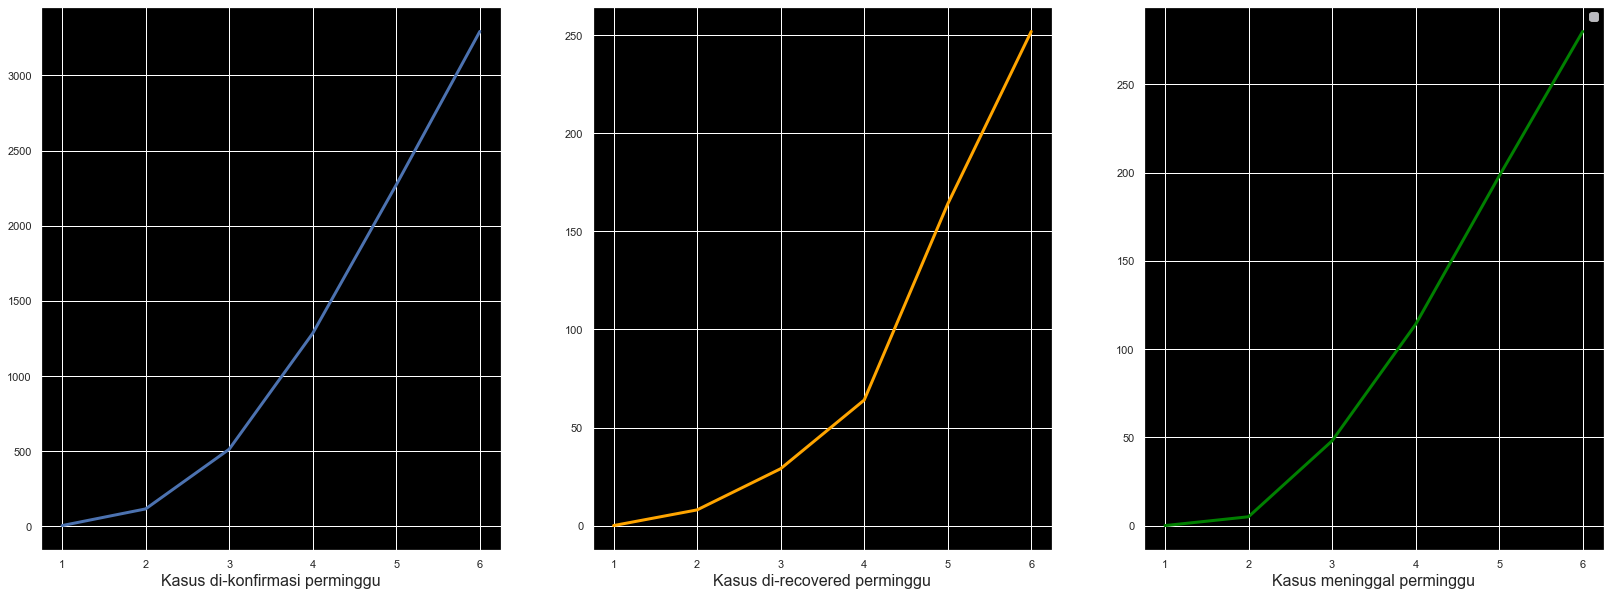

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(28,10))
datewise_indo["WeekOfYear"]=datewise_indo.index.weekofyear

week_num_indo=[]
indo_weekwise_confirmed=[]
indo_weekwise_recovered=[]
indo_weekwise_deaths=[]
w=1
for i in list(datewise_indo["WeekOfYear"].unique()):
    indo_weekwise_confirmed.append(datewise_indo[datewise_indo["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    indo_weekwise_recovered.append(datewise_indo[datewise_indo["WeekOfYear"]==i]["Recovered"].iloc[-1])
    indo_weekwise_deaths.append(datewise_indo[datewise_indo["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num_indo.append(w)
    w=w+1
    
ax1.plot(week_num_indo,indo_weekwise_confirmed,linewidth=3)
ax1.set_facecolor('black')
ax1.set_xlabel('Kasus di-konfirmasi perminggu', fontsize=16)
ax2.plot(week_num_indo,indo_weekwise_recovered,linewidth=3,color='orange')
ax2.set_facecolor('black')
ax2.set_xlabel('Kasus di-recovered perminggu', fontsize=16)
ax3.plot(week_num_indo,indo_weekwise_deaths,linewidth=3,color='green')
ax3.set_facecolor('black')
ax3.set_xlabel('Kasus meninggal perminggu', fontsize=16)
plt.legend()

### <span style="color:red"> Keterangan Grafik - Kasus perminggu</span>

- <code style="background:yellow;color:black">Pada minggu ke-6 kasus di-konfirmasi sudah mencapai angka 3000 lebih, lalu untuk kasus di-recovered pada minggu ke-6 mencapai lebih kurang 200 kasus sedangkan kasus kematian mencapai angka lebih dari 200 pada minggu ke-6. </code>

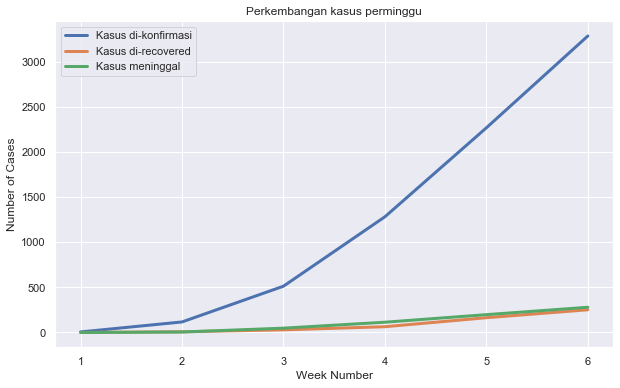

In [39]:
plt.figure(figsize=(10,6))
plt.plot(week_num_indo,indo_weekwise_confirmed,linewidth=3,label="Kasus di-konfirmasi")
plt.plot(week_num_indo,indo_weekwise_recovered,linewidth=3,label="Kasus di-recovered")
plt.plot(week_num_indo,indo_weekwise_deaths,linewidth=3,label="Kasus meninggal")
plt.xlabel('Week Number')
plt.ylabel("Number of Cases")
plt.title("Perkembangan kasus perminggu")
plt.legend()

### <span style="color:red"> Keterangan Grafik - Kasus perminggu</span>

- <code style="background:yellow;color:black">Grafik ini sama dengan grafik diatas, namun disatukan menjadi satu grafik untuk melihat secara keseluruhan perkembangan kasus COVID-19 di Indonesia. </code>

Text(0.5, 1.0, "Indonesians's Weekwise increase in Number of Death Cases")

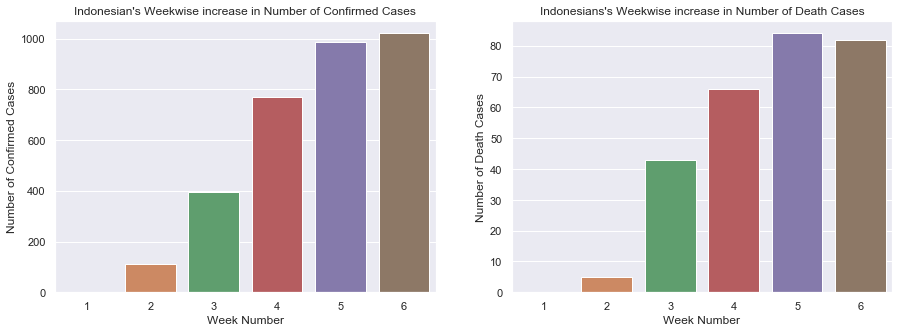

In [40]:
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(15,5))
sns.barplot(x=week_num_indo,y=pd.Series(indo_weekwise_confirmed).diff().fillna(0),ax=ax1)
sns.barplot(x=week_num_indo,y=pd.Series(indo_weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Number of Confirmed Cases")
ax2.set_ylabel("Number of Death Cases")
ax1.set_title("Indonesian's Weekwise increase in Number of Confirmed Cases")
ax2.set_title("Indonesians's Weekwise increase in Number of Death Cases")

### <span style="color:red"> Keterangan Grafik - Kasus di-konfirmasi dan kasus kematian perminggu</span>

- <code style="background:yellow;color:black">Pada kasus di-konfirmasi grafik menunjukan peningkatan perminggunya, sedangkan pada grafik kematian, terjadi penurunan di minggu ke-6. </code>

It took 34 days in Italy to reach number of Confirmed Cases equivalent to Indonesia
It took 53 days in USA to reach number of Confirmed Cases equivalent to Indonesia
It took 41 days in Spain to reach number of Confirmed Cases equivalent to Indonesia
It took 39 days in Indonesia to reach 3293.0 Confirmed Cases


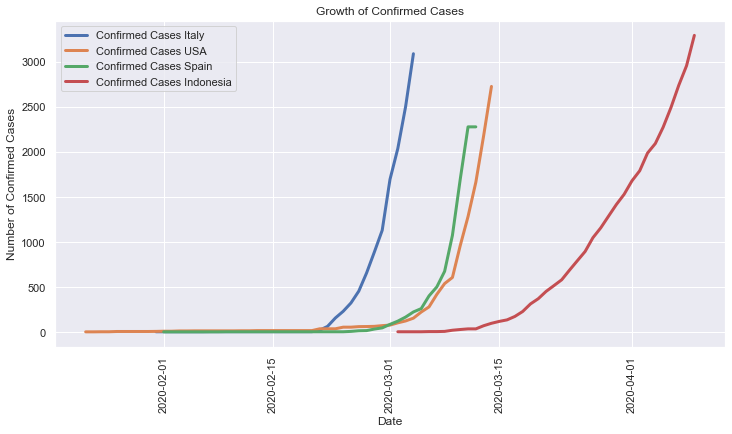

In [41]:
max_ind=datewise_indo["Confirmed"].max()
plt.figure(figsize=(12,6))
plt.plot(datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Italy",linewidth=3)
plt.plot(datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases USA",linewidth=3)
plt.plot(datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)]["Confirmed"],label="Confirmed Cases Spain",linewidth=3)
plt.plot(datewise_indo[datewise_indo["Confirmed"]>0]["Confirmed"],label="Confirmed Cases Indonesia",linewidth=3)
plt.xlabel("Date")
plt.ylabel("Number of Confirmed Cases")
plt.title("Growth of Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)

print("It took",datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases equivalent to Indonesia")
print("It took",datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)].shape[0],"days in USA to reach number of Confirmed Cases equivalent to Indonesia")
print("It took",datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases equivalent to Indonesia")
print("It took",datewise_indo[datewise_indo["Confirmed"]>0].shape[0],"days in Indonesia to reach",max_ind,"Confirmed Cases")

### <span style="color:red"> Keterangan Grafik - Pertumbuhan kasus di indonesia</span>

- <code style="background:yellow;color:black">Butuh 39 hari untuk Indonesia mencapai angka 3293 untuk kasus di-konfirmasi, diatas adalah perbandingan dengan Italy, USA dan spain.</code>

(array([737456., 737470., 737485., 737499., 737516.]),
 <a list of 5 Text xticklabel objects>)

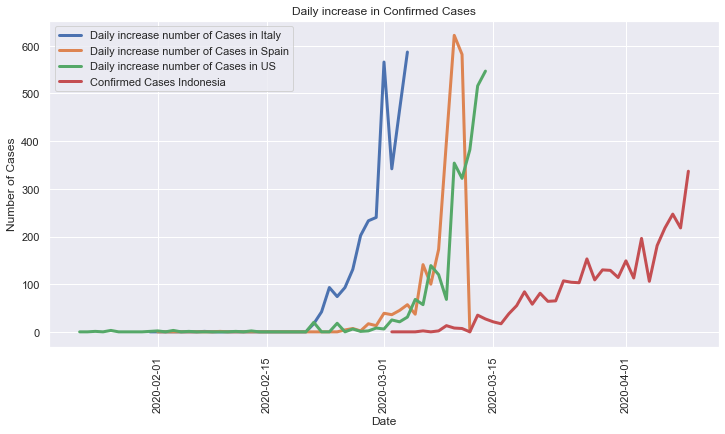

In [42]:
plt.figure(figsize=(12,6))
plt.plot(datewise_Italy[(datewise_Italy["Confirmed"]>0)&(datewise_Italy["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in Italy",linewidth=3)
plt.plot(datewise_Spain[(datewise_Spain["Confirmed"]>0)&(datewise_Spain["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in Spain",linewidth=3)
plt.plot(datewise_US[(datewise_US["Confirmed"]>0)&(datewise_US["Confirmed"]<=max_ind)]["Confirmed"].diff().fillna(0),label="Daily increase number of Cases in US",linewidth=3)
plt.plot(datewise_indo[datewise_indo["Confirmed"]>0]["Confirmed"].diff().fillna(0),label="Confirmed Cases Indonesia",linewidth=3)
plt.ylabel("Number of Cases")
plt.xlabel("Date")
plt.title("Daily increase in Confirmed Cases")
plt.legend()
plt.xticks(rotation=90)

### <span style="color:red"> Pertumbuhan kasus perhari di Italy, Spain, US dan Indonesia</span>

- <code style="background:yellow;color:black">Perbandingan pertumbuhan COVID-19 di keempat negara. </code>

In [43]:
covid_19_INDONESIA = covid[covid['Country/Region'] == 'Indonesia']
covid_19_INDONESIA = covid.groupby("ObservationDate")["Confirmed", "Deaths", "Recovered"].sum().reset_index()
covid_19_INDONESIA.tail()

,ObservationDate,Confirmed,Deaths,Recovered
74,2020-04-05,1272115.0,69374.0,260012.0
75,2020-04-06,1345101.0,74565.0,276515.0
76,2020-04-07,1426096.0,81865.0,300054.0
77,2020-04-08,1511104.0,88338.0,328661.0
78,2020-04-09,1595350.0,95455.0,353975.0


- <code style="background:yellow;color:black">Angka kasus di Indonesia. </code>

<code style="background:black;color:white"> Analisa COVID-19 Dataset Indonesia.</code>

In [44]:
cases = pd.read_csv("cases.csv")
confirmed_acc = pd.read_csv("confirmed_acc.csv")
jabar = pd.read_csv("jabar.csv")
jakarta = pd.read_csv("jakarta.csv")
keywordtrend = pd.read_csv("keywordtrend.csv")
patient = pd.read_csv("patient.csv")
province_timeline = pd.read_csv("province_timeline.csv")

In [45]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
date                  30 non-null object
new_tested            28 non-null float64
acc_tested            30 non-null int64
new_confirmed         30 non-null int64
acc_confirmed         30 non-null int64
acc_negative          30 non-null int64
being_checked         30 non-null int64
isolated              30 non-null int64
new_released          30 non-null int64
acc_released          30 non-null int64
new_deceased          30 non-null int64
acc_deceased          30 non-null int64
positive_rate         30 non-null object
negative_rate         30 non-null object
decease_rate          30 non-null object
release_rate          30 non-null object
dailypositive_rate    30 non-null object
dtypes: float64(1), int64(10), object(6)
memory usage: 4.1+ KB


- <code style="background:yellow;color:black">Keterangan kolom dataset Indonesia. </code>

In [46]:
cases

,date,new_tested,acc_tested,new_confirmed,acc_confirmed,acc_negative,being_checked,isolated,new_released,acc_released,new_deceased,acc_deceased,positive_rate,negative_rate,decease_rate,release_rate,dailypositive_rate
0,2-Mar-20,NaN,339,2,2,335,2,2,0,0,0,0,0.59%,98.82%,0.00%,0.00%,0.00%
1,3-Mar-20,2.0,341,0,2,337,2,2,0,0,0,0,0.59%,98.83%,0.00%,0.00%,0.00%
2,4-Mar-20,31.0,372,0,2,356,14,2,0,0,0,0,0.54%,95.70%,0.00%,0.00%,0.00%
3,5-Mar-20,16.0,388,0,2,371,15,2,0,0,0,0,0.52%,95.62%,0.00%,0.00%,0.00%
4,6-Mar-20,62.0,450,2,4,422,24,4,0,0,0,0,0.89%,93.78%,0.00%,0.00%,3.23%
5,7-Mar-20,4.0,454,0,4,422,28,4,0,0,0,0,0.88%,92.95%,0.00%,0.00%,0.00%
6,8-Mar-20,29.0,483,2,6,445,32,6,0,0,0,0,1.24%,92.13%,0.00%,0.00%,6.90%
7,9-Mar-20,60.0,543,13,19,487,37,19,0,0,0,0,3.50%,89.69%,0.00%,0.00%,21.67%
8,10-Mar-20,151.0,694,8,27,648,19,27,0,0,0,0,3.89%,93.37%,0.00%,0.00%,5.30%
9,11-Mar-20,99.0,793,7,34,744,15,30,2,2,2,2,4.29%,93.82%,5.88%,5.88%,7.07%


- <code style="background:yellow;color:black">Dataset indonesia. </code>

date
30-Mar-20    6663
29-Mar-20    6534
Name: acc_tested, dtype: int64
date
27-Mar-20    5775
26-Mar-20    4336
25-Mar-20    3822
Name: acc_tested, dtype: int64


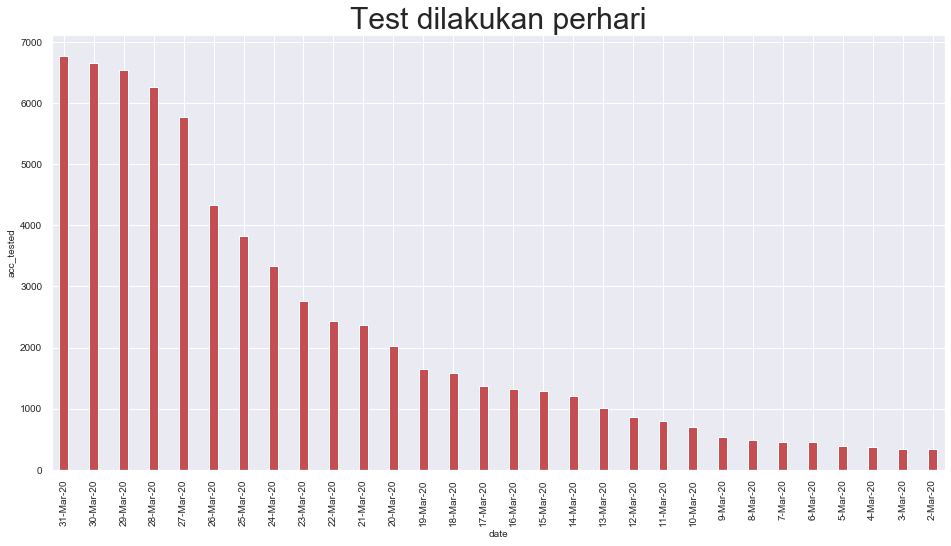

In [47]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
cases.groupby('date').mean().sort_values(by='acc_tested', ascending=False)['acc_tested'].plot('bar', color='r',width=0.3,title='Test dilakukan perhari', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('acc_tested')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(cases.groupby('date').mean().sort_values(by='acc_tested', ascending=False)['acc_tested'][[1,2]])
print(cases.groupby('date').mean().sort_values(by='acc_tested', ascending=False)['acc_tested'][[4,5,6]])

### <span style="color:red"> Keterangan Grafik - Daily Test</span>

- <code style="background:yellow;color:black">Drafik pengadaan test perhari di indonesia pertanggal 31 Maret 2020. </code>

date
4/9/2020    3293
4/8/2020    2956
Name: cases, dtype: int64
date
4/6/2020    2491
4/5/2020    2273
4/4/2020    2092
Name: cases, dtype: int64


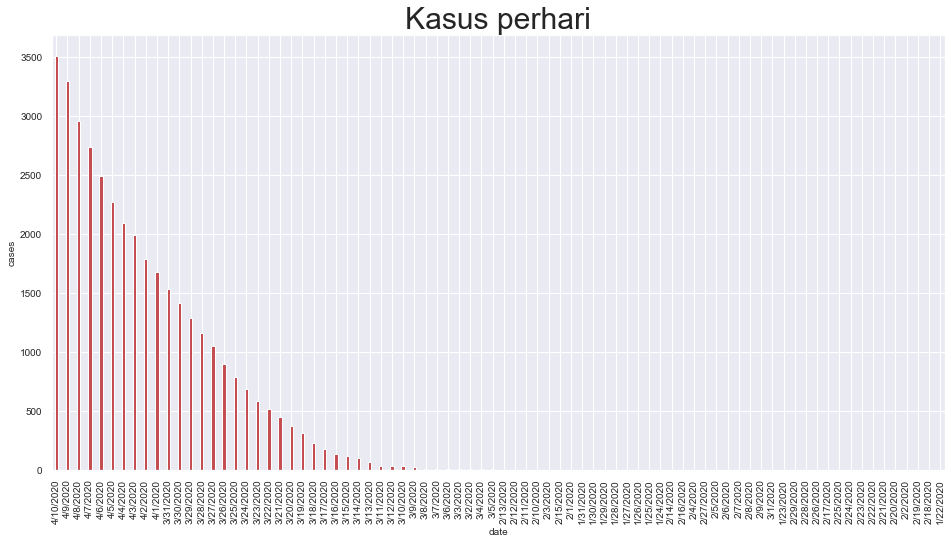

In [48]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
confirmed_acc.groupby('date').mean().sort_values(by='cases', ascending=False)['cases'].plot('bar', color='r',width=0.3,title='Kasus perhari', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('cases')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(confirmed_acc.groupby('date').mean().sort_values(by='cases', ascending=False)['cases'][[1,2]])
print(confirmed_acc.groupby('date').mean().sort_values(by='cases', ascending=False)['cases'][[4,5,6]])

### <span style="color:red"> Keterangan Grafik - Kasus perhari</span>

- <code style="background:yellow;color:black">Kasus perhari sampai tanggal 9 Maret 2020 di indonesia. </code>

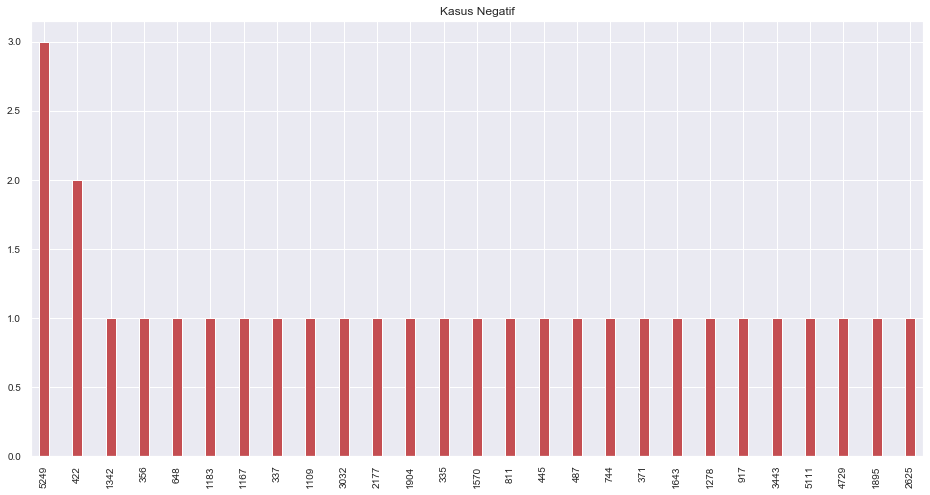

In [49]:
fig = plt.figure(figsize=(16,8))
cases.acc_negative.value_counts().plot(kind='bar',color='r',width=0.3,title='Kasus Negatif', fontsize=10)
plt.show()

### <span style="color:red"> Keterangan Grafik - Kasus Negatif</span>

- <code style="background:yellow;color:black">Kasus negatif di indonesia. </code>

In [50]:
jakarta

,date,odp_process,odp_end,odp_total,pdp_process,pdp_end,pdp_total,jakbar,jakpus,jaksel,jaktim,jakut,outsidejakarta,unknown,confirmed,released,deceased,hospitalized,self_isolated
0,3/1/2020,14.0,115.0,129.0,9.0,30.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/2/2020,14.0,115.0,129.0,9.0,30.0,39.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/3/2020,94.0,121.0,215.0,24.0,30.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/4/2020,120.0,121.0,241.0,26.0,30.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/5/2020,127.0,140.0,267.0,49.0,34.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3/6/2020,83.0,221.0,304.0,44.0,44.0,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3/7/2020,94.0,262.0,356.0,44.0,54.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3/8/2020,64.0,298.0,362.0,57.0,70.0,127.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3/9/2020,68.0,310.0,378.0,87.0,79.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3/10/2020,70.0,331.0,401.0,97.0,100.0,197.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- <code style="background:yellow;color:black">Data COVID=19 Untuk Jakarta. </code>

date
3/25/2020    1872.0
3/24/2020    1811.0
Name: odp_total, dtype: float64
date
3/22/2020    1447.0
3/21/2020    1306.0
3/20/2020    1209.0
Name: odp_total, dtype: float64


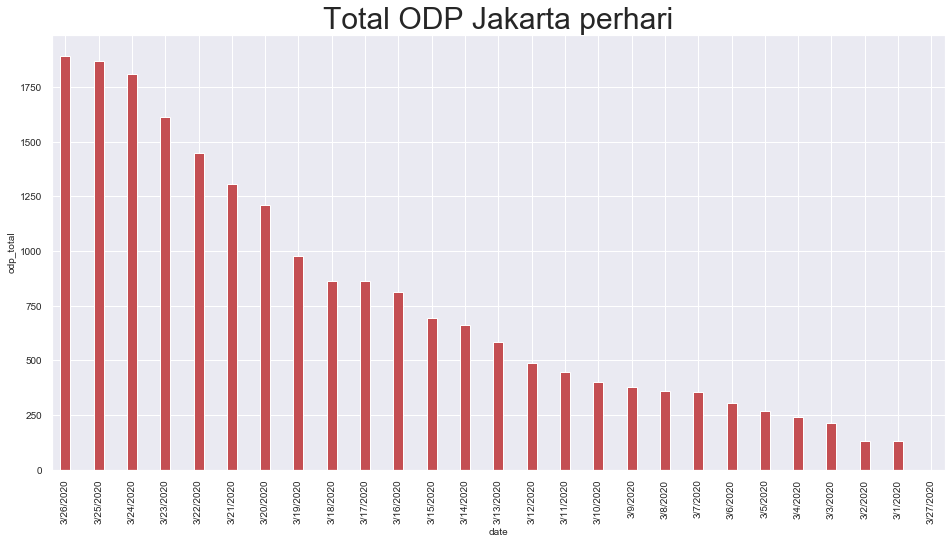

In [51]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
jakarta.groupby('date').mean().sort_values(by='odp_total', ascending=False)['odp_total'].plot('bar', color='r',width=0.3,title='Total ODP Jakarta perhari', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('odp_total')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(jakarta.groupby('date').mean().sort_values(by='odp_total', ascending=False)['odp_total'][[1,2]])
print(jakarta.groupby('date').mean().sort_values(by='odp_total', ascending=False)['odp_total'][[4,5,6]])

### <span style="color:red"> Keterangan Grafik - ODP Jakarta</span>

- <code style="background:yellow;color:black">Grafik pertumbuhan ODP di Jakarta. </code>

date
3/25/2020    899.0
3/24/2020    849.0
Name: pdp_total, dtype: float64
date
3/22/2020    646.0
3/21/2020    528.0
3/20/2020    505.0
Name: pdp_total, dtype: float64


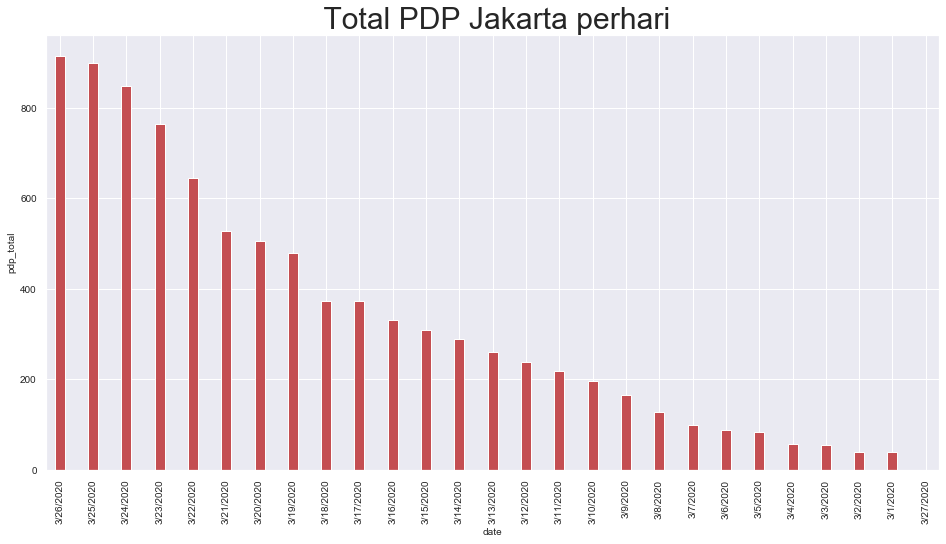

In [52]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
jakarta.groupby('date').mean().sort_values(by='pdp_total', ascending=False)['pdp_total'].plot('bar', color='r',width=0.3,title=' Total PDP Jakarta perhari', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('pdp_total')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(jakarta.groupby('date').mean().sort_values(by='pdp_total', ascending=False)['pdp_total'][[1,2]])
print(jakarta.groupby('date').mean().sort_values(by='pdp_total', ascending=False)['pdp_total'][[4,5,6]])

### <span style="color:red"> Keterangan Grafik - PDP Jakarta</span>

- <code style="background:yellow;color:black">Data PDP di Jakarta diambil pada bulan Maret 2020. </code>

In [53]:
jabar

,date,positive_total,positive_daily,odp_process,odp_end,odp_total,odp_daily,pdp_process,pdp_end,pdp_total,...,total_positive_kabgarut,total_positive_kabindramayu,total_positive_kabkarawang,total_positive_kabmajalengka,total_positive_kabpangandaran,total_positive_kabsubang,total_positive_kabtasikmalaya,total_positive_kotabanjar,total_positive_kotacirebon,total_positive_kotasukabumi
0,01-Mar-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,02-Mar-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03-Mar-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,04-Mar-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,05-Mar-20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,06-Mar-20,3,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,07-Mar-20,3,0,0,0,429,0,0,0,48,...,0,0,0,0,0,0,0,0,0,0
7,08-Mar-20,3,0,0,0,429,0,0,0,48,...,0,0,0,0,0,0,0,0,0,0
8,09-Mar-20,3,0,0,0,533,0,0,0,49,...,0,0,0,0,0,0,0,0,0,0
9,10-Mar-20,3,0,0,0,592,59,0,0,53,...,0,0,0,0,0,0,0,0,0,0


- <code style="background:yellow;color:black">Data COVID=19 Untuk Jawa Barat. </code>

date
7-Apr-20    343
6-Apr-20    263
Name: positive_total, dtype: int64
date
4-Apr-20    247
3-Apr-20    225
1-Apr-20    220
Name: positive_total, dtype: int64


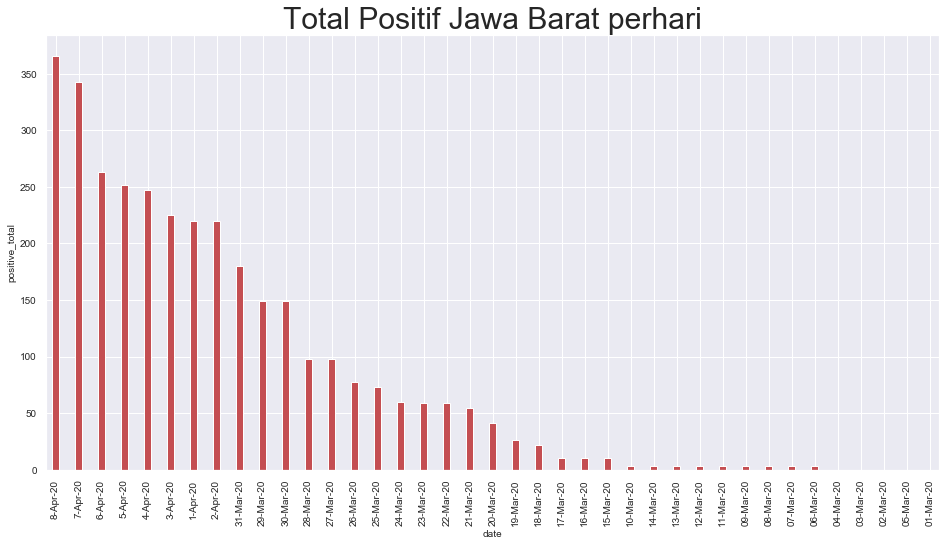

In [54]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
jabar.groupby('date').mean().sort_values(by='positive_total', ascending=False)['positive_total'].plot('bar', color='r',width=0.3,title='Total Positif Jawa Barat perhari', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('positive_total')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(jabar.groupby('date').mean().sort_values(by='positive_total', ascending=False)['positive_total'][[1,2]])
print(jabar.groupby('date').mean().sort_values(by='positive_total', ascending=False)['positive_total'][[4,5,6]])

### <span style="color:red"> Keterangan Grafik - Kasus positif di Jawa Barat</span>

- <code style="background:yellow;color:black">Perkembangan kasus positif di Jawa Barat perhari. </code>

date
7-Apr-20    21991
6-Apr-20    21991
Name: odp_total, dtype: int64
date
4-Apr-20    20712
3-Apr-20    16932
1-Apr-20    14291
Name: odp_total, dtype: int64


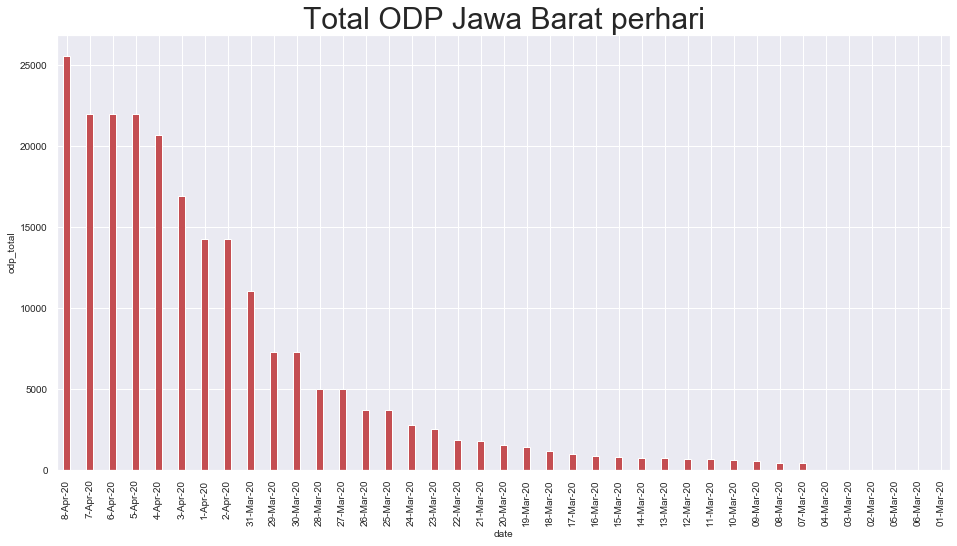

In [55]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
jabar.groupby('date').mean().sort_values(by='odp_total', ascending=False)['odp_total'].plot('bar', color='r',width=0.3,title='Total ODP Jawa Barat perhari', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('odp_total')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(jabar.groupby('date').mean().sort_values(by='odp_total', ascending=False)['odp_total'][[1,2]])
print(jabar.groupby('date').mean().sort_values(by='odp_total', ascending=False)['odp_total'][[4,5,6]])

### <span style="color:red"> Keterangan Grafik - Total ODP Jawa Barat</span>

- <code style="background:yellow;color:black">Total ODP di Jawa Barat. </code>

date
7-Apr-20    1451
6-Apr-20    1451
Name: pdp_total, dtype: int64
date
4-Apr-20    1354
3-Apr-20    1205
2-Apr-20    1003
Name: pdp_total, dtype: int64


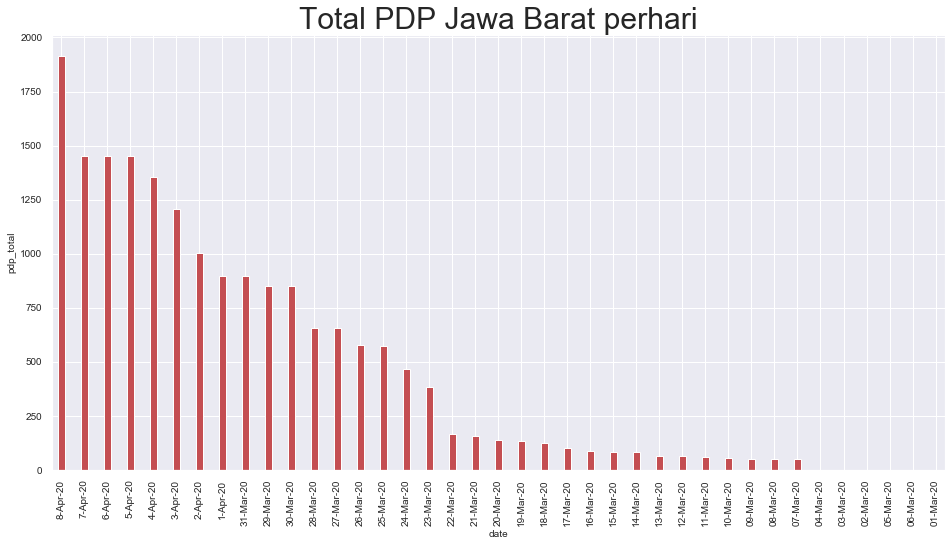

In [56]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
jabar.groupby('date').mean().sort_values(by='pdp_total', ascending=False)['pdp_total'].plot('bar', color='r',width=0.3,title='Total PDP Jawa Barat perhari', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('pdp_total')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(10)
ax.yaxis.label.set_fontsize(10)
print(jabar.groupby('date').mean().sort_values(by='pdp_total', ascending=False)['pdp_total'][[1,2]])
print(jabar.groupby('date').mean().sort_values(by='pdp_total', ascending=False)['pdp_total'][[4,5,6]])

### <span style="color:red"> Keterangan Grafik - PDP Jawa Barat</span>

- <code style="background:yellow;color:black">Perkembangan PDP di Jawa Barat. </code>

In [57]:
patient

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan
...,...,...,...,...,...,...,...,...,...,...,...
888,889,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
889,890,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
890,891,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN
891,892,NaN,NaN,NaN,NaN,NaN,NaN,26-Mar-20,NaN,NaN,NaN


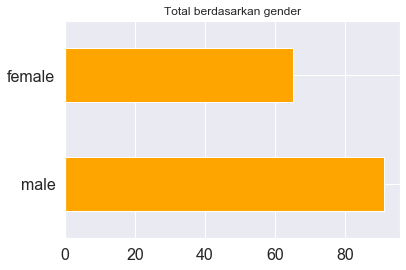

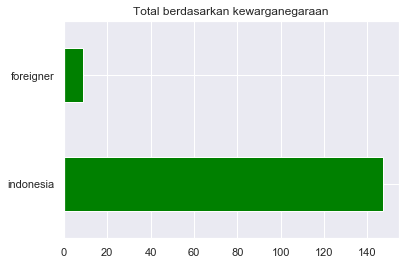

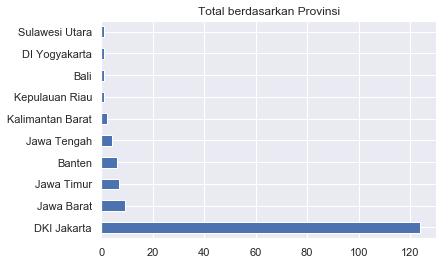

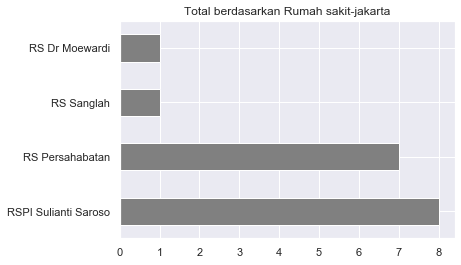

In [58]:
patient.gender.value_counts().plot(kind='barh',color='orange',title='Total berdasarkan gender',fontsize=16)
plt.show()
patient.nationality.value_counts().plot(kind='barh',color='green', title='Total berdasarkan kewarganegaraan')
plt.show()
patient.province.value_counts().plot(kind='barh',title='Total berdasarkan Provinsi')
plt.show()
patient.hospital.value_counts().plot(kind='barh',color='grey', title='Total berdasarkan Rumah sakit-jakarta')
plt.show()

### <span style="color:red"> Keterangan Grafik - Sebaran data</span>

- <code style="background:yellow;color:black">Sebaran data gender, kewarganegaraan, provinsi dan rumah sakit kasus COVID-19 di Indonesia </code>

##  <code style="background:Green;color:white">Prediksi menggunakan Model Machine Learning

<code style="background:black;color:white"> Linear Regression Model untuk Confirm Cases Prediction.</code>

In [10]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [11]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.90):]
model_scores=[]

- <code style="background:yellow;color:black">Membuat data train dan validasi untuk Linier Regression. Train diambil dari tanggal 22 Januari sampai 01 April. Sedangkan untuk validasi diambil tanggal 02 April sampai 09 April </code>

In [12]:
train_ml

,Confirmed,Recovered,Deaths,Days Since
ObservationDate,,,,
2020-01-22,555.0,28.0,17.0,0
2020-01-23,653.0,30.0,18.0,1
2020-01-24,941.0,36.0,26.0,2
2020-01-25,1438.0,39.0,42.0,3
2020-01-26,2118.0,52.0,56.0,4
...,...,...,...,...
2020-03-28,660693.0,139415.0,30652.0,66
2020-03-29,720140.0,149082.0,33925.0,67
2020-03-30,782389.0,164566.0,37582.0,68


- <code style="background:yellow;color:black">Data Train. </code>

In [13]:
valid_ml

,Confirmed,Recovered,Deaths,Days Since
ObservationDate,,,,
2020-04-02,1013303.0,210263.0,52983.0,71
2020-04-03,1095917.0,225796.0,58787.0,72
2020-04-04,1197408.0,246152.0,64606.0,73
2020-04-05,1272115.0,260012.0,69374.0,74
2020-04-06,1345101.0,276515.0,74565.0,75
2020-04-07,1426096.0,300054.0,81865.0,76
2020-04-08,1511104.0,328661.0,88338.0,77
2020-04-09,1595350.0,353975.0,95455.0,78


- <code style="background:yellow;color:black">Data Validasi. </code>

In [14]:
lin_reg=LinearRegression(normalize=True)

In [15]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

- <code style="background:yellow;color:black">Train data kolom day since dengan kolom confirmed yang sudah di normalize. </code>

In [16]:
prediction_valid_linreg=lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_linreg

array([[457547.13400402],
       [465742.75744467],
       [473938.38088531],
       [482134.00432596],
       [490329.6277666 ],
       [498525.25120724],
       [506720.87464789],
       [514916.49808853]])

- <code style="background:yellow;color:black">Predict valid kolom day since. </code>

In [17]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))
print("Root Mean Square Error for Linear Regression: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg)))

Root Mean Square Error for Linear Regression:  838197.9203347286


- <code style="background:yellow;color:black">RMSE dari Linier Regression. </code>

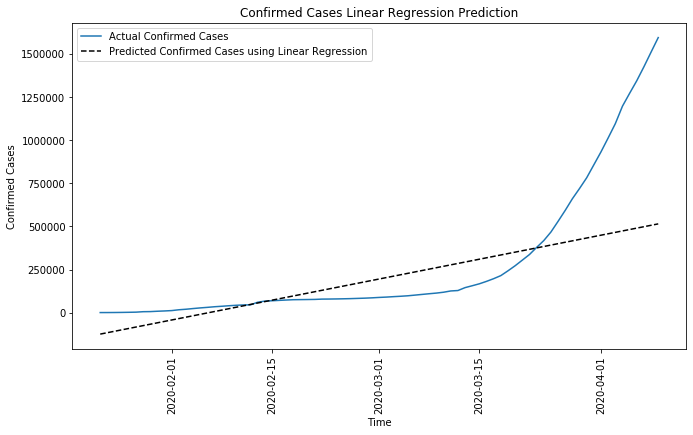

In [18]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

#### Linear Regression Model terlihat berangtakan. Seperti itu jelas terlihat bahwa tren Confirmed cases tidak sama sekali Linear

- <code style="background:yellow;color:black">Grafik prediksi dan data aktual linier regression, dilihat dari grafik prediksi tidak sama sekali mendekati da. </code>

<code style="background:black;color:white"> Support Vector Machine Model Regressor untuk Prediction of Confirmed Cases.</code>

In [53]:
#Inisialisasi SVR Model dengan hyperparameters untuk GridSearchCV
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [54]:
svm

SVR(C=1, cache_size=200, coef0=0.0, degree=6, epsilon=0.01,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
#Melakukan GridSearchCV untuk menemukan Estimator terbaik
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Confirmed"]).reshape(-1,1))

C:\Users\ikik\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


- <code style="background:yellow;color:black">GridsearchCV untuk menemukan Estimator terbaik untuk Machin Learning Support Vector Machine. </code>

In [ ]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [48]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
print("Root Mean Square Error for Support Vectore Machine: ",np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))

Root Mean Square Error for Support Vectore Machine:  50167.10314784511


- <code style="background:yellow;color:black">RMSE Support Vector Machine, hasil ini lumayan baik dibanding Linier Regression. </code>

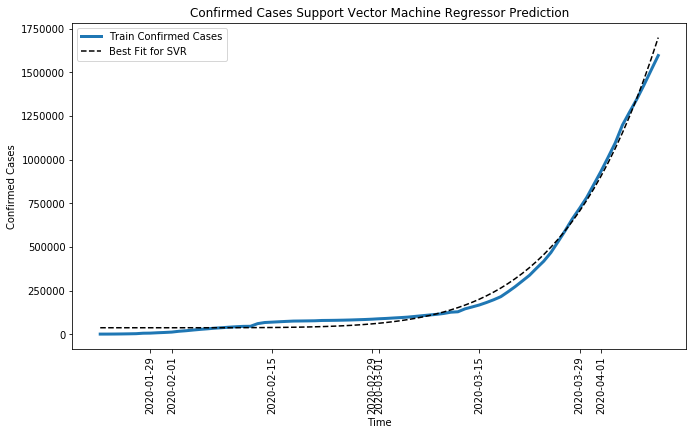

In [49]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

- <code style="background:yellow;color:black">Grafik prediksi mendekati data aktual untuk prediksi kasus confirmed </code>

In [84]:
new_date=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))

- <code style="background:yellow;color:black">Membuat table perbandingan prediksi Linier Regression dan SVM </code>

In [51]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns=["Dates","Linear Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,SVM Prediction
0,2020-04-10,523112.121529,1830144.144691
1,2020-04-11,531307.744970,1970719.965772
2,2020-04-12,539503.368410,2120361.783051
3,2020-04-13,547698.991851,2279531.430232
4,2020-04-14,555894.615292,2448708.165547


- <code style="background:yellow;color:black">prediksi 4 hari pertama setelah pembuatan coding </code>

#### Predictions of Linear Regression sama sekali tidak mendekati angak aktual

### AR Model

In [147]:
model_ar=ARIMA(log_series,(5,2,0))
model_ar_fit=model_ar.fit()

In [148]:
prediction_ar=model_ar_fit.forecast(len(valid))[0]
y_pred["AR Model Prediction"]=list(np.exp(prediction_ar))

In [149]:
model_scores.append(np.sqrt(mean_squared_error(list(valid["Confirmed"]),np.exp(prediction_ar))))
print("Root Mean Square Error for AR Model: ",np.sqrt(mean_squared_error(list(valid["Confirmed"]),np.exp(prediction_ar))))

Root Mean Square Error for AR Model:  343519.5234643571


(array([737456., 737470., 737485., 737499., 737516.]),
 <a list of 5 Text xticklabel objects>)

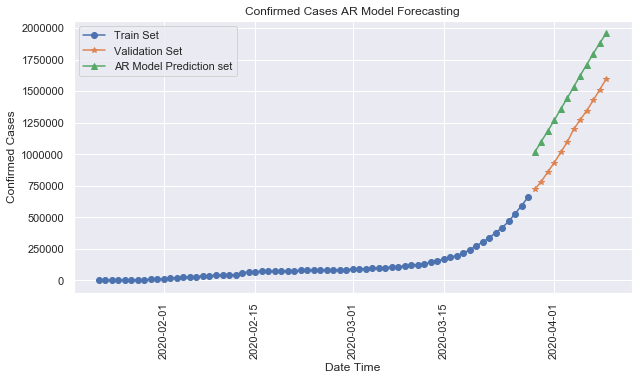

In [123]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='*')
plt.plot(y_pred["AR Model Prediction"],label="AR Model Prediction set",marker="^")
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases AR Model Forecasting")
plt.xticks(rotation=90)

In [124]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(np.exp(model_ar_fit.forecast(len(valid)+i)[0][-1]))

In [125]:
pd.DataFrame(zip(new_date,AR_model_new_prediction),columns=["Deaths","AR Model Forecast"]).head()

,Deaths,AR Model Forecast
0,2020-04-10,2034664.211055
1,2020-04-11,2105945.125221
2,2020-04-12,2171511.338587
3,2020-04-13,2231625.249655
4,2020-04-14,2284718.767932


### ARIMA Model

In [126]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.90)]
valid=datewise.iloc[int(datewise.shape[0]*0.90):]
log_series=np.log(model_train["Confirmed"])
y_pred=valid.copy()

In [127]:
model_arima=ARIMA(log_series,(5,2,1))
model_arima_fit=model_arima.fit()

In [128]:
prediction_arima=model_arima_fit.forecast(len(valid))[0]
y_pred["ARIMA Model Prediction"]=list(np.exp(prediction_arima))

In [129]:
model_scores.append(np.sqrt(mean_squared_error(list(valid["Confirmed"]),np.exp(prediction_arima))))
print("Root Mean Square Error for ARIMA Model: ",np.sqrt(mean_squared_error(list(valid["Confirmed"]),np.exp(prediction_arima))))

Root Mean Square Error for ARIMA Model:  13097.4998404158


(array([737456., 737470., 737485., 737499., 737516.]),
 <a list of 5 Text xticklabel objects>)

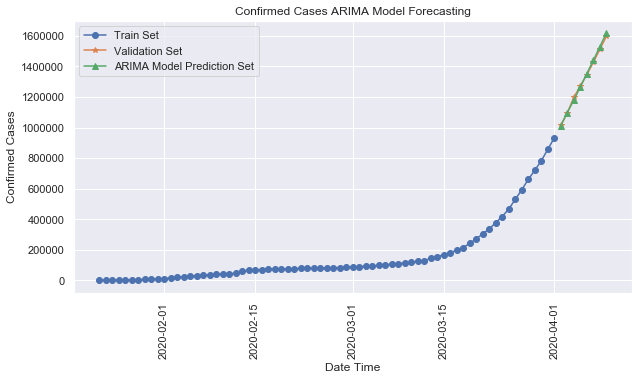

In [130]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",marker='o')
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",marker='*')
plt.plot(y_pred["ARIMA Model Prediction"],label="ARIMA Model Prediction Set",marker='^')
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases ARIMA Model Forecasting")
plt.xticks(rotation=90)

In [131]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(np.exp(model_arima_fit.forecast(len(valid)+i)[0][-1]))

### Time Series Forecasting untuk Death Cases

(array([737456., 737470., 737485., 737499., 737516.]),
 <a list of 5 Text xticklabel objects>)

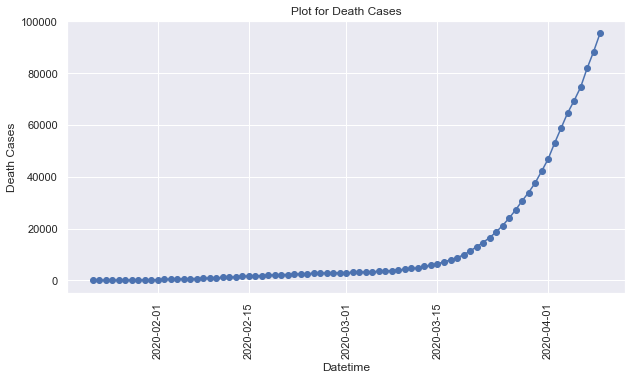

In [132]:
plt.figure(figsize=(10,5))
plt.plot(datewise["Deaths"],marker='o')
plt.ylabel("Death Cases")
plt.xlabel("Datetime")
plt.title("Plot for Death Cases")
plt.xticks(rotation=90)

In [133]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]
y_pred=valid.copy()

(array([737446., 737456., 737463., 737470., 737477., 737485., 737492.,
        737499., 737506.]), <a list of 9 Text xticklabel objects>)

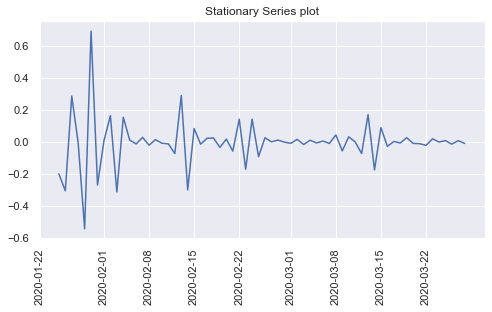

In [136]:
series=(log_deaths.diff().diff().diff()).dropna()
plt.figure(figsize=(8,4))
plt.plot(series)
plt.title("Stationary Series plot")
plt.xticks(rotation=90)

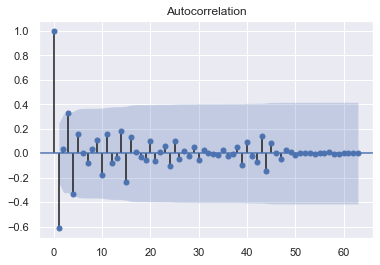

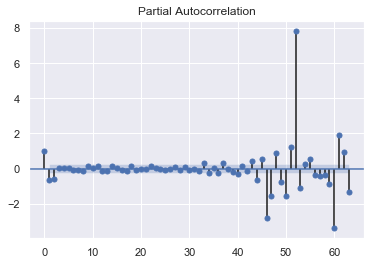

In [137]:
plot_acf(series)
plt.show()
plot_pacf(series)
plt.show()

In [138]:
model_arima_deaths=ARIMA(log_deaths,(5,2,1))     
model_arima_deaths_fit=model_arima_deaths.fit()

In [139]:
predictions_deaths=np.exp(model_arima_deaths_fit.forecast(len(valid))[0])
y_pred["ARIMA Death Prediction"]=predictions_deaths

In [140]:
print("Root Mean Square Error: ",np.sqrt(mean_squared_error(valid["Deaths"],predictions_deaths)))

Root Mean Square Error:  1021.8722996905492


(array([737456., 737470., 737485., 737499., 737516.]),
 <a list of 5 Text xticklabel objects>)

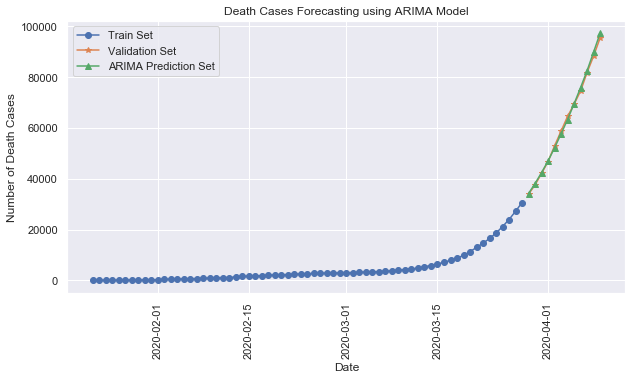

In [141]:
plt.figure(figsize=(10,5))
plt.plot(model_train["Deaths"],label="Train Set",marker="o")
plt.plot(valid["Deaths"],label="Validation Set",marker="*")
plt.plot(y_pred["ARIMA Death Prediction"],label="ARIMA Prediction Set",marker="^")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of Death Cases")
plt.title("Death Cases Forecasting using ARIMA Model")
plt.xticks(rotation=90)

In [142]:
ARIMA_model_death_forecast=[]
for i in range(1,18):
    ARIMA_model_death_forecast.append(np.exp(model_arima_deaths_fit.forecast(len(valid)+i)[0][-1]))

In [143]:
pd.DataFrame(zip(new_date,ARIMA_model_death_forecast),columns=["Deaths","ARIMA Model Death Forecast"]).head()

,Deaths,ARIMA Model Death Forecast
0,2020-04-10,105060.957400
1,2020-04-11,113269.193000
2,2020-04-12,121401.255724
3,2020-04-13,129805.590826
4,2020-04-14,138607.494010


In [144]:
pd.DataFrame(zip(new_date,ARIMA_model_death_forecast),columns=["Deaths","ARIMA Model Death Forecast"]).tail()

,Deaths,ARIMA Model Death Forecast
12,2020-04-22,207500.998919
13,2020-04-23,215321.499682
14,2020-04-24,222468.284907
15,2020-04-25,229518.606221
16,2020-04-26,235901.586434


In [145]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date,AR_model_new_prediction, ARIMA_model_death_forecast),columns=["Dates","AR Model","ARIMA Model"])
model_predictions.head() 

,Dates,AR Model,ARIMA Model
0,2020-04-10,2034664.211055,105060.957400
1,2020-04-11,2105945.125221,113269.193000
2,2020-04-12,2171511.338587,121401.255724
3,2020-04-13,2231625.249655,129805.590826
4,2020-04-14,2284718.767932,138607.494010


In [146]:
model_predictions.tail()

,Dates,AR Model,ARIMA Model
12,2020-04-22,2420825.238458,207500.998919
13,2020-04-23,2398915.087599,215321.499682
14,2020-04-24,2368655.580766,222468.284907
15,2020-04-25,2330336.312902,229518.606221
16,2020-04-26,2284294.715128,235901.586434
